In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score,StratifiedKFold,KFold
from sklearn.feature_selection import SelectKBest,f_classif,SelectFdr
from sklearn.preprocessing import normalize,RobustScaler,StandardScaler,StandardScaler
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import backend
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import GlorotUniform,RandomUniform,Constant
from scipy.stats import spearmanr

HGCC

In [2]:
# load hgss
hgcc = pd.read_csv("expression_HGCC_process.txt")
hgcc = hgcc.set_index(['Unnamed: 0'])
hgcc

DDX11L1   MIR1302     OR4F5  LOC100132287    OR4F29    FAM87B  \
Unnamed: 0                                                                   
U3002       7.492044  4.448381  7.201031     20.392616  6.994599  9.120080   
U3005       7.760504  4.514967  7.467019     20.499620  7.060806  9.257457   
U3008       7.809732  4.518275  6.793803     20.653373  6.857094  9.345375   
U3009       7.708828  4.543112  7.300991     20.330065  7.454074  8.841156   
U3013       8.006363  4.660041  7.527509     20.797326  7.390290  8.999943   
...              ...       ...       ...           ...       ...       ...   
U3279       7.440700  4.441387  6.610795     20.002897  6.816720  9.232039   
U3281       7.706110  4.567018  6.744724     20.412182  6.473119  9.244304   
U3289       7.662703  4.493960  7.026526     20.816928  6.616382  9.075734   
U3291       7.686020  4.570930  6.739636     20.874461  6.909793  9.145930   
U3299       7.808625  4.557514  7.404493     20.938566  6.999286  9.181393   

            LOC643837  LOC284600    SAMD11    KLHL17  ...   C6orf48   MIR4640  \
Unnamed: 0                                            ...                       
U3002       -2.060678  14.233757  6.073479  6.742516  ...  4.104252  9.702530   
U3005       -2.191413  14.308089  6.005418  6.793031  ...  3.972574  9.435160   
U3008       -2.061809  14.055224  6.017329  6.700175  ...  3.738444  9.532752   
U3009       -2.918767  14.221705  5.912544  6.662150  ...  4.252509  9.587403   
U3013       -2.292708  14.429849  5.808011  6.683298  ...  4.616261  9.409397   
...               ...        ...       ...       ...  ...       ...       ...   
U3279       -1.916584  14.255723  6.055667  6.635965  ...  3.195660  9.318981   
U3281       -1.928519  14.312590  6.137620  6.840070  ...  3.680145  9.648695   
U3289       -2.352818  14.310227  6.024498  6.642040  ...  3.868349  9.359777   
U3291       -2.265726  14.395100  6.028366  6.739518  ...  3.584117  9.498600   
U3299       -2.058702  14.248945  5.879997  6.588029  ...  4.354062  9.539690   

                 RDBP      PPT2       MSH5  LOC389831   FLJ43315  LINC00281  \
Unnamed: 0                                                                    
U3002       10.059019  5.776337  23.987513  22.306305  11.205840   5.800045   
U3005       10.340899  5.925610  24.195775  21.725956  10.346503   5.553206   
U3008        9.728603  5.682545  23.029059  21.162263  10.782755   5.833381   
U3009       10.225841  5.725929  23.368686  21.966364  10.687558   5.491537   
U3013       10.514069  6.286707  24.396197  23.046791  10.778859   5.530116   
...               ...       ...        ...        ...        ...        ...   
U3279        9.711426  5.534263  22.422150  21.775283  10.751038   5.577867   
U3281        9.768373  5.772724  22.764116  21.303211  10.955103   5.897419   
U3289        9.863986  5.717143  23.403272  22.296026  10.761720   5.714394   
U3291        9.681177  5.666316  22.609205  20.916359  10.525517   5.655891   
U3299        9.660272  5.861479  23.565886  21.827959  10.939604   5.870930   

            LOC389834  LOC283788  
Unnamed: 0                        
U3002       16.732169   5.370010  
U3005       16.639381   5.615062  
U3008       16.948429   5.884612  
U3009       16.174006   5.935465  
U3013       16.447750   5.432421  
...               ...        ...  
U3279       15.394902   5.885976  
U3281       15.559430   6.278439  
U3289       17.105420   5.958603  
U3291       15.585929   5.606224  
U3299       14.880185   5.393612  

[83 rows x 23832 columns]

In [3]:
# GDSC genes
genes_GDSC_oxa = pd.read_csv("genes_GDSC_oxa.csv")
genes_GDSC_oxa

Unnamed: 0 Unnamed: 0.1
0               0       TSPAN6
1               1         DPM1
2               2        SCYL3
3               3          FGR
4               4          CFH
...           ...          ...
10227       10227    LINC00657
10228       10228          MIA
10229       10229    LINC00514
10230       10230    LINC00526
10231       10231       UBL5P2

[10232 rows x 2 columns]

In [4]:
# find overlap genes between two datasets
overlp = list(set(hgcc.columns) & set(genes_GDSC_oxa["Unnamed: 0.1"]))
overlp

['EXOSC2',
 'PKIA',
 'BAK1',
 'FXYD3',
 'CCL3',
 'RHPN2',
 'CYR61',
 'ZKSCAN1',
 'RAB3GAP2',
 'KCNK5',
 'PNP',
 'LTBP2',
 'MITD1',
 'SLC25A18',
 'KIAA0247',
 'LOX',
 'ATP6V0B',
 'DKC1',
 'HIST1H3H',
 'G0S2',
 'GNGT2',
 'CHRNB1',
 'ORC3',
 'AGXT2L1',
 'GPX7',
 'ZNF222',
 'LSM2',
 'UBE2H',
 'KIF2C',
 'ANXA10',
 'SH3D19',
 'MAPK14',
 'CCDC130',
 'ZNF7',
 'ARID1B',
 'TLR2',
 'TMEM132A',
 'TCEAL4',
 'MANBAL',
 'STX10',
 'FAM200B',
 'ARHGEF10L',
 'TMEM100',
 'DAP',
 'C11orf74',
 'ZNF513',
 'MARCH2',
 'MSANTD2',
 'RNF13',
 'NRD1',
 'CCDC102A',
 'OCEL1',
 'C10orf10',
 'LIPC',
 'DDX3Y',
 'ACTN1',
 'DST',
 'MYCN',
 'CYP1B1',
 'SOX8',
 'SGMS2',
 'GNA15',
 'C14orf80',
 'GPR155',
 'RNF144A',
 'DCTN2',
 'NFYA',
 'DDHD2',
 'ACPL2',
 'CCDC74A',
 'INPP5F',
 'TRPC4',
 'METTL8',
 'DPEP3',
 'VPS72',
 'FGF1',
 'C14orf142',
 'USP11',
 'SMAD4',
 'TAF7L',
 'DERL3',
 'SPP1',
 'UGT3A2',
 'CNTN3',
 'CXXC4',
 'FURIN',
 'EID2B',
 'C1RL',
 'COL5A2',
 'PHF20L1',
 'SUCNR1',
 'NHLH2',
 'ATP6V1C1',
 'SPHK1',
 'CTR9',
 

In [5]:
len(overlp)

9955

In [6]:
# use only overlap genes in HGCC for transfer
hgcc1 = hgcc[overlp]
hgcc1

EXOSC2      PKIA      BAK1     FXYD3       CCL3     RHPN2  \
Unnamed: 0                                                                
U3002       1.186920  0.539170  2.327313  8.769826  13.307296  2.636864   
U3005       0.965918  0.118200  2.559473  8.698499  13.461807  1.823654   
U3008       0.925473  0.600302  2.414677  8.693724  13.307485  3.402797   
U3009       1.452039 -0.230328  2.524372  8.653190  13.507147  2.261137   
U3013       1.284742  0.619034  3.046119  9.175803  13.233478  2.764109   
...              ...       ...       ...       ...        ...       ...   
U3279       0.587654  0.800692  2.502226  8.471876  13.054959  2.404101   
U3281       1.101975  0.905820  2.444965  8.530983  13.139058  2.223236   
U3289       0.811710  1.019157  2.488370  8.582528  13.176239  2.644719   
U3291       0.574251  1.015050  2.436234  8.586434  13.425573  2.645568   
U3299       1.550820  0.737510  2.516195  9.097430  13.283276  1.750362   

               CYR61   ZKSCAN1  RAB3GAP2     KCNK5  ...     STXBP5      CXCL1  \
Unnamed: 0                                          ...                         
U3002      -7.640829  6.004504  8.828093  7.532322  ...  10.858721   9.946953   
U3005      -9.321591  5.535688  8.499490  7.539104  ...  11.018336   9.932729   
U3008      -5.741082  6.198060  8.671514  7.487015  ...  10.909774   9.776649   
U3009      -8.984003  5.629908  9.122560  7.396625  ...  11.036097   9.856038   
U3013      -7.845954  5.939136  8.344139  7.458118  ...  11.497633   9.468047   
...              ...       ...       ...       ...  ...        ...        ...   
U3279      -5.058139  6.453874  8.671235  7.270786  ...  11.379270   9.350402   
U3281      -6.352122  5.737713  8.257657  7.578948  ...  11.033499  10.049452   
U3289      -6.600485  6.208419  8.569075  7.402143  ...  10.849312   9.626185   
U3291      -5.904765  6.219307  8.630300  7.446008  ...  11.027708   9.828761   
U3299      -7.309211  7.036749  8.993227  7.562053  ...  11.289733   9.409448   

                PGK1     UBE2A   SCGB2A1  C16orf45     ACRBP   ARL14EP  \
Unnamed: 0                                                               
U3002       3.404457  1.468345  4.688948 -5.946220  8.067133  1.553562   
U3005       3.474554  1.485454  4.612260 -6.081485  7.959743  1.099572   
U3008       3.143911  1.165820  4.316471 -6.179681  8.093537  1.824591   
U3009       3.770435  1.562250  4.446878 -6.150262  7.925314  1.426653   
U3013       3.929130  1.612525  4.375935 -8.836750  8.053292  1.066762   
...              ...       ...       ...       ...       ...       ...   
U3279       2.859414  1.340980  4.283621 -6.093964  7.880589  1.602327   
U3281       2.942013  1.272037  4.465342 -6.157087  8.056060  1.720211   
U3289       3.208480  1.136342  4.540204 -6.158648  7.998120  1.629939   
U3291       3.004745  1.193311  4.507928 -6.211528  7.956191  1.606232   
U3299       3.857372  1.753381  4.358145 -6.779458  7.863424  1.159421   

              TMEM17   ZCCHC10  
Unnamed: 0                      
U3002       0.245650 -1.865479  
U3005       0.435942 -2.130302  
U3008       0.432175 -1.942907  
U3009       0.696646 -1.829806  
U3013       0.137049 -1.827492  
...              ...       ...  
U3279       0.558553 -1.924094  
U3281       0.291054 -1.692996  
U3289       0.347437 -1.753207  
U3291       0.334683 -1.746925  
U3299       0.905119 -1.911370  

[83 rows x 9955 columns]

In [7]:
new_genes = list(set(genes_GDSC_oxa["Unnamed: 0.1"]).difference(overlp))
new_genes

['HLA-A',
 'ZSCAN31',
 'COA4',
 'MROH1',
 'WT1-AS',
 'ZBTB21',
 'HLA-C',
 'IFNLR1',
 'HLA-DRB1',
 'AQP1',
 'LINC00839',
 'CCAR1',
 'KRTAP2-3',
 'SLX4IP',
 'RTFDC1',
 'MCM3AP-AS1',
 'GCSAML',
 'LINC00657',
 'GPATCH2L',
 'AHRR',
 'EVA1A',
 'DENND6B',
 'RMDN2',
 'ZNF106',
 'MEIOB',
 'TANGO6',
 'ERVMER34-1',
 'TSACC',
 'ANKRD54',
 'SIGLEC5',
 'OXLD1',
 'NELFCD',
 'EVA1C',
 'KIAA1551',
 'TRDC',
 'IGHV1-69',
 'BRICD5',
 'CDIP1',
 'MRGBP',
 'SMIM15',
 'MPC2',
 'ZNRD1-AS1',
 'TATDN1P1',
 'OGFOD3',
 'IGLL5',
 'MTPN',
 'FDPSP1',
 'OFD1P17',
 'RNF149',
 'PABPC1P3',
 'PLGLB2',
 'GGACT',
 'UBE2CP1',
 'KCNJ12',
 'SMIM4',
 'SUPT20H',
 'RMDN1',
 'LGMNP1',
 'PYURF',
 'PAXBP1',
 'PBDC1',
 'SSUH2',
 'IPO11',
 'HLA-DRB5',
 'NAP1L1P3',
 'SEC31B',
 'THEMIS2',
 'HLA-DRA',
 'ANKEF1',
 'MIR205HG',
 'CCSER2',
 'METTL25',
 'NSMF',
 'TIMP2',
 'ERICH2',
 'C17orf76-AS1',
 'TMEM183A',
 'HIRA',
 'C15orf48',
 'KCTD14',
 'OARD1',
 'ADPRM',
 'MIR17HG',
 'ELMSAN1',
 'NKX2-4',
 'PROSER2',
 'HLA-DOB',
 'TCAIM',
 'NDUFAF7',

In [8]:
len(new_genes)

277

In [22]:
# set missing genes as 0 in HGCC
hgcc1[new_genes] = 0
hgcc1

EXOSC2      PKIA      BAK1     FXYD3       CCL3     RHPN2  \
Unnamed: 0                                                                
U3002       1.186920  0.539170  2.327313  8.769826  13.307296  2.636864   
U3005       0.965918  0.118200  2.559473  8.698499  13.461807  1.823654   
U3008       0.925473  0.600302  2.414677  8.693724  13.307485  3.402797   
U3009       1.452039 -0.230328  2.524372  8.653190  13.507147  2.261137   
U3013       1.284742  0.619034  3.046119  9.175803  13.233478  2.764109   
...              ...       ...       ...       ...        ...       ...   
U3279       0.587654  0.800692  2.502226  8.471876  13.054959  2.404101   
U3281       1.101975  0.905820  2.444965  8.530983  13.139058  2.223236   
U3289       0.811710  1.019157  2.488370  8.582528  13.176239  2.644719   
U3291       0.574251  1.015050  2.436234  8.586434  13.425573  2.645568   
U3299       1.550820  0.737510  2.516195  9.097430  13.283276  1.750362   

               CYR61   ZKSCAN1  RAB3GAP2     KCNK5  ...  MAP10  CD302  GPRC5A  \
Unnamed: 0                                          ...                         
U3002      -7.640829  6.004504  8.828093  7.532322  ...    0.0    0.0     0.0   
U3005      -9.321591  5.535688  8.499490  7.539104  ...    0.0    0.0     0.0   
U3008      -5.741082  6.198060  8.671514  7.487015  ...    0.0    0.0     0.0   
U3009      -8.984003  5.629908  9.122560  7.396625  ...    0.0    0.0     0.0   
U3013      -7.845954  5.939136  8.344139  7.458118  ...    0.0    0.0     0.0   
...              ...       ...       ...       ...  ...    ...    ...     ...   
U3279      -5.058139  6.453874  8.671235  7.270786  ...    0.0    0.0     0.0   
U3281      -6.352122  5.737713  8.257657  7.578948  ...    0.0    0.0     0.0   
U3289      -6.600485  6.208419  8.569075  7.402143  ...    0.0    0.0     0.0   
U3291      -5.904765  6.219307  8.630300  7.446008  ...    0.0    0.0     0.0   
U3299      -7.309211  7.036749  8.993227  7.562053  ...    0.0    0.0     0.0   

            ZFAS1  HLA-DPA1  RNPS1P1  HLA-V  EVA1B  EPB41L4A-AS1  SNHG12  
Unnamed: 0                                                                
U3002         0.0       0.0      0.0    0.0    0.0           0.0     0.0  
U3005         0.0       0.0      0.0    0.0    0.0           0.0     0.0  
U3008         0.0       0.0      0.0    0.0    0.0           0.0     0.0  
U3009         0.0       0.0      0.0    0.0    0.0           0.0     0.0  
U3013         0.0       0.0      0.0    0.0    0.0           0.0     0.0  
...           ...       ...      ...    ...    ...           ...     ...  
U3279         0.0       0.0      0.0    0.0    0.0           0.0     0.0  
U3281         0.0       0.0      0.0    0.0    0.0           0.0     0.0  
U3289         0.0       0.0      0.0    0.0    0.0           0.0     0.0  
U3291         0.0       0.0      0.0    0.0    0.0           0.0     0.0  
U3299         0.0       0.0      0.0    0.0    0.0           0.0     0.0  

[83 rows x 10232 columns]

In [23]:
# set index consistent to gdsc
hgcc2 = hgcc1[genes_GDSC_oxa["Unnamed: 0.1"]]
hgcc2

TSPAN6      DPM1     SCYL3        FGR        CFH     FUCA2  \
Unnamed: 0                                                                 
U3002       5.233414  2.660420  6.892279  10.150239  28.709341  1.790770   
U3005       4.638291  2.940720  6.879116  10.183847  29.519232  2.289351   
U3008       5.628872  3.222674  6.857331  10.000939  31.131291  1.912692   
U3009       4.769873  2.992917  7.151517  10.065556  29.047655  1.588500   
U3013       5.334269  3.013803  6.844563  10.170692  28.603761  2.948010   
...              ...       ...       ...        ...        ...       ...   
U3279       5.059770  3.212913  6.687213   9.947862  28.065632  1.778032   
U3281       5.506877  2.621987  6.427750  10.098166  29.399037  1.188470   
U3289       4.601688  2.675119  6.699410  10.052378  30.250448  1.467189   
U3291       4.872073  2.575432  6.537216  10.040752  29.360780  1.258349   
U3299       5.356058  2.039635  7.458398  10.023197  29.183810  2.015058   

                 GCLC      NFYA    NIPAL3      ENPP4  ...      CUX1  UBE2CP1  \
Unnamed: 0                                            ...                      
U3002       14.696460  4.512648 -4.924656   9.487966  ...  5.114680      0.0   
U3005       14.823729  4.953917 -4.352487   9.201192  ...  4.662334      0.0   
U3008       15.189328  4.723261 -4.607070  12.189659  ...  5.206334      0.0   
U3009       15.295365  4.679638 -4.314203   9.263036  ...  4.744350      0.0   
U3013       15.762985  5.005224 -4.842354  13.055595  ...  4.812802      0.0   
...               ...       ...       ...        ...  ...       ...      ...   
U3279       15.255000  4.788047 -4.606841  11.198522  ...  5.142649      0.0   
U3281       15.243622  4.786237 -4.822635  10.044526  ...  4.989989      0.0   
U3289       15.184623  4.748379 -4.470840  11.679252  ...  4.609822      0.0   
U3291       15.056295  4.661365 -4.781681   9.956748  ...  5.115850      0.0   
U3299       15.434776  4.899980 -3.927613   9.577872  ...  4.562982      0.0   

                CEP95  SMIM6    MRPL46  LINC00657        MIA  LINC00514  \
Unnamed: 0                                                                
U3002       14.395882    0.0  0.785044        0.0   9.616577   9.036744   
U3005       14.737296    0.0  0.584484        0.0   9.591050   9.123258   
U3008       14.423014    0.0  0.721091        0.0   9.741428   9.021888   
U3009       14.760638    0.0  0.894721        0.0   9.451543   9.068044   
U3013       14.744885    0.0  0.804400        0.0  10.705247   8.988595   
...               ...    ...       ...        ...        ...        ...   
U3279       14.270241    0.0  0.535294        0.0   9.755086   9.069492   
U3281       14.638477    0.0  0.298874        0.0   9.894714   9.318117   
U3289       14.263227    0.0  0.655743        0.0  10.136255   8.923306   
U3291       14.586798    0.0  0.417707        0.0   9.832938   9.275996   
U3299       14.602698    0.0  0.441452        0.0  10.176975   8.985629   

            LINC00526  UBL5P2  
Unnamed: 0                     
U3002        1.558821     0.0  
U3005        1.094101     0.0  
U3008        1.554222     0.0  
U3009        1.786369     0.0  
U3013        1.142401     0.0  
...               ...     ...  
U3279        1.473986     0.0  
U3281        1.788028     0.0  
U3289        1.487999     0.0  
U3291        1.841550     0.0  
U3299        2.106733     0.0  

[83 rows x 10232 columns]

In [24]:
# load AUC in HGCC
auc = pd.read_csv("outcomes_HGCC_process2.txt")
auc = auc.drop(['Unnamed: 0'],axis = 1)
auc = auc.set_index(['Group.1'])
auc

AUC_Temozolomide
Group.1                  
U3002            1.074831
U3005            0.983924
U3008            1.098339
U3009            1.161972
U3013            1.071861
...                   ...
U3279            1.067637
U3281            1.102921
U3289            1.028595
U3291            1.049006
U3299            1.044045

[83 rows x 1 columns]

(array([ 2.,  1.,  5., 15., 17., 12., 15., 10.,  4.,  2.]),
 array([0.82620292, 0.87035061, 0.91449829, 0.95864597, 1.00279365,
        1.04694133, 1.09108901, 1.1352367 , 1.17938438, 1.22353206,
        1.26767974]),
 <BarContainer object of 10 artists>)

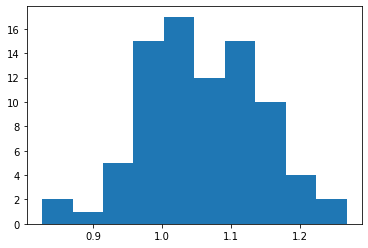

In [25]:
plt.hist(auc["AUC_Temozolomide"])

(array([ 2.,  1.,  5., 15., 17., 12., 15., 10.,  4.,  2.]),
 array([0.55852318, 0.60267087, 0.64681855, 0.69096623, 0.73511391,
        0.77926159, 0.82340927, 0.86755696, 0.91170464, 0.95585232,
        1.        ]),
 <BarContainer object of 10 artists>)

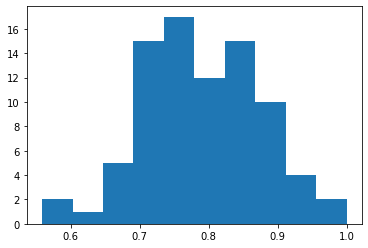

In [26]:
# normalize AUC to [0,1]
auc_correct = auc["AUC_Temozolomide"]-auc["AUC_Temozolomide"].max() +1
plt.hist(auc_correct)

In [28]:
# initialize model
seed_num = 1000
init = RandomUniform(seed = seed_num)

def create_model(activation1 = "sigmoid",activation2="softplus",l2 = 0.001,l1=0.001,opt = tf.keras.optimizers.Adam(learning_rate= 0.0001)):
     
    model = Sequential()
    
    model.add(Dense(1000,activation= activation1,input_shape=(10232,), #23832
                    kernel_regularizer=regularizers.l2(l2),
                    activity_regularizer=regularizers.l1(l1),
                    kernel_initializer= init))#kernel_initializer="pretrained"             
    
    model.add(Dropout(0.3))
    
    model.add(Dense(100, activation=activation2,kernel_initializer= init))
                    
    model.add(Dropout(0.1))
    
    model.add(Dense(1, activation= activation2))
        
    model.compile(loss='mean_squared_error',optimizer = opt,metrics=['mae']) #SGD
        
    return model

In [15]:
# define R2 evaluation metric and loss function plots

def R2(observ,pred):
    SSres = 0
    SStot = 0
    for i in range(0,len(observ)):
        yo = observ[i]
        yp = pred[i]
        SSres += (yo-yp)**2
        SStot += (yo-observ.mean())**2
    print(SSres)
    print(SStot)
    r2 = 1-SSres/SStot
    return(r2)

def plt_loss(train_loss,validate_loss,fold_no):
    plt.figure(figsize=(8, 8))
    #plt.subplot(5, 1, fold_no)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(validate_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss')
    #plt.ylim([0,0.6])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

(array([ 2.,  1.,  5., 15., 17., 12., 15., 10.,  4.,  2.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

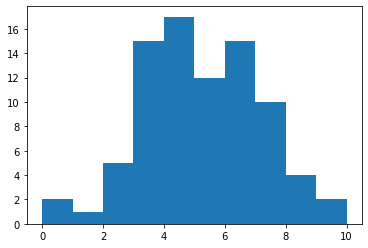

In [16]:
# rescale AUC to the range of [0,10]
auc_norm = auc_correct
auc_norm = (auc_norm - auc_norm.min())/(auc_norm.max()-auc_norm.min())
auc_norm = auc_norm*10
auc_norm = pd.DataFrame(auc_norm)
plt.hist(auc_norm)

In [19]:
Standard = StandardScaler()

In [21]:
# load train/test split to run the experiments based on the same partitions
train_test_index = pd.read_csv("../train_test_index_hgcc.txt", sep="[", header=None)

line = 0

train_index = [0] * 10
test_index = [0] * 10

for seed in range(0,10):
    
    train_index[seed] = [0] * 5
    test_index[seed] = [0] * 5
    
    for fold in range(0,5):
        
        # get index train
        train_index[seed][fold] = train_test_index[1][line].split()
        # string to int
        train_index[seed][fold] = [eval(i) for i in train_index[seed][fold]]
        
                # get index train
        test_index[seed][fold] = train_test_index[2][line].split()
        # string to int
        test_index[seed][fold] = [eval(i) for i in test_index[seed][fold]]
        
        line += 1

train_index

[[[0,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   12,
   14,
   15,
   17,
   18,
   19,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   38,
   39,
   40,
   41,
   43,
   45,
   46,
   47,
   48,
   49,
   50,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   69,
   71,
   72,
   73,
   74,
   77,
   78,
   79,
   80,
   81],
  [0,
   1,
   2,
   3,
   5,
   7,
   11,
   13,
   14,
   15,
   16,
   17,
   19,
   20,
   22,
   23,
   25,
   26,
   27,
   28,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   50,
   51,
   52,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   80,
   81,
   82],
  [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,


# transfer

In [26]:
# load weights from the pre-train model
pre_model = create_model()
pre_model.load_weights("GDSC_model_oxaliplatin.h5")

In [30]:
# standardize the dataset
# predict with the pre-trained weights without fine-tuning
hgcc_norm = Robust.fit_transform(hgcc2)
pred_auc = pre_model.predict(hgcc_norm)

In [31]:
spearmanr(auc_norm["AUC_Temozolomide"],pred_auc)

SpearmanrResult(correlation=0.11878174719785063, pvalue=0.2848293404831757)

In [29]:
R2(auc_norm["AUC_Temozolomide"],pred_auc)

[1038.2418]
302.2816303782043


array([-2.434684], dtype=float32)

In [32]:
# load pre-trained weights to the model
def create_model2(activation1 = "sigmoid",activation2 = "softplus",l2 = 0.0001,l1=0.0001,
                  opt = tf.keras.optimizers.Adam(learning_rate=0.001)):
    
    model = Sequential()
    
    model.add(Dense(1000,activation= activation1,input_shape=(10232,),
                    kernel_regularizer=regularizers.l2(l2),
                    activity_regularizer=regularizers.l1(l1),
                    weights = [pre_model.layers[0].get_weights()[0],pre_model.layers[0].get_weights()[1]]))            
    
    model.add(Dropout(0.3))
    
    model.add(Dense(100, activation=activation2,
                    kernel_initializer=init
                    # weights = [pre_model.layers[2].get_weights()[0],pre_model.layers[2].get_weights()[1]]
                   )
             )
                    
    model.add(Dropout(0.1))
    
    model.add(Dense(1, activation= activation2, kernel_initializer=init))
        
   
    model.compile(loss='mse',
                  optimizer = opt,
                  metrics=['mean_absolute_error'])                      
        
    return model

------------------------------------------------------------------------
Training for fold 1, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 11s 221ms/sample - loss: 23.5310 - mean_absolute_error: 4.4381 - val_loss: 19.1649 - val_mean_absolute_error: 4.0482
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 22.7139 - mean_absolute_error: 4.3485 - val_loss: 18.5613 - val_mean_absolute_error: 3.9742
Epoch 3/50
52/52 [==============================] - 0s 5ms/sample - loss: 21.4780 - mean_absolute_error: 4.2156 - val_loss: 17.9446 - val_mean_absolute_error: 3.8969
Epoch 4/50
52/52 [==============================] - 0s 5ms/sample - loss: 20.6137 - mean_absolute_error: 4.1168 - val_loss: 17.3126 - val_mean_absolute_error: 3.8163
Epoch 5/50
52/52 [==============================] - 0s 5ms/sample - loss: 19.6572 - mean_absolute_error: 4.0017 - val_loss: 16.6668 - val_mean_absolute_error: 3.7327
Epoch 6/50
52/52

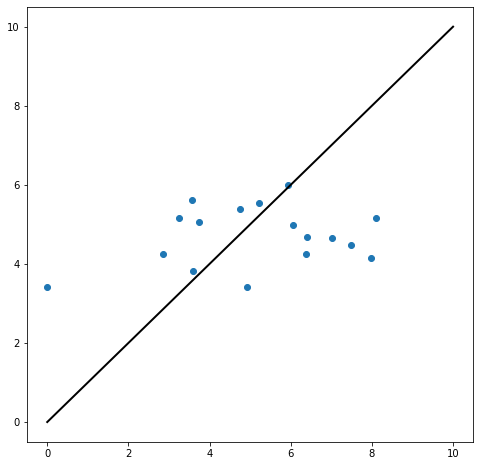

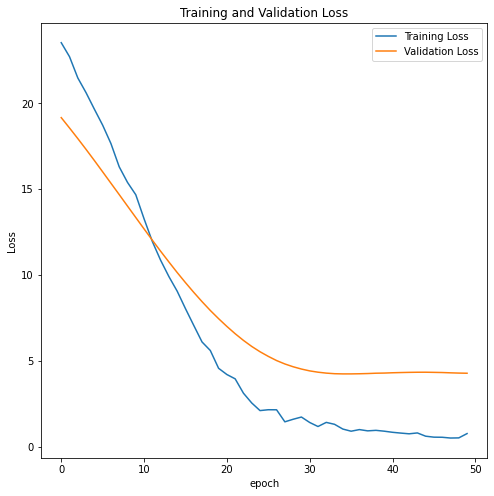

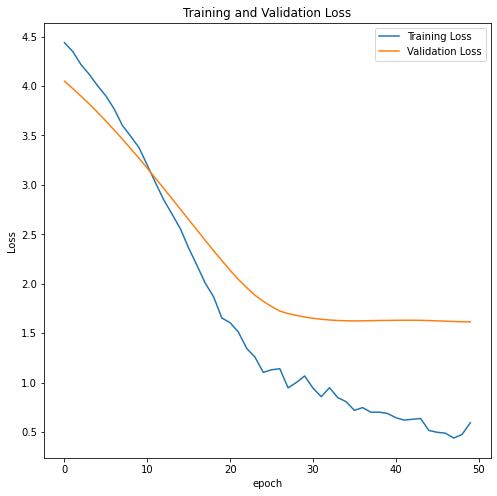

------------------------------------------------------------------------
Training for fold 2, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 12s 224ms/sample - loss: 22.3032 - mean_absolute_error: 4.2582 - val_loss: 25.7017 - val_mean_absolute_error: 4.7685
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 21.2910 - mean_absolute_error: 4.1504 - val_loss: 24.9570 - val_mean_absolute_error: 4.6920
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.3393 - mean_absolute_error: 4.0413 - val_loss: 24.1835 - val_mean_absolute_error: 4.6114
Epoch 4/50
52/52 [==============================] - 0s 5ms/sample - loss: 19.5922 - mean_absolute_error: 3.9632 - val_loss: 23.3932 - val_mean_absolute_error: 4.5276
Epoch 5/50
52/52 [==============================] - 0s 5ms/sample - loss: 18.6482 - mean_absolute_error: 3.8332 - val_loss: 22.5822 - val_mean_absolute_error: 4.4402
Epoch 6/50
52/52

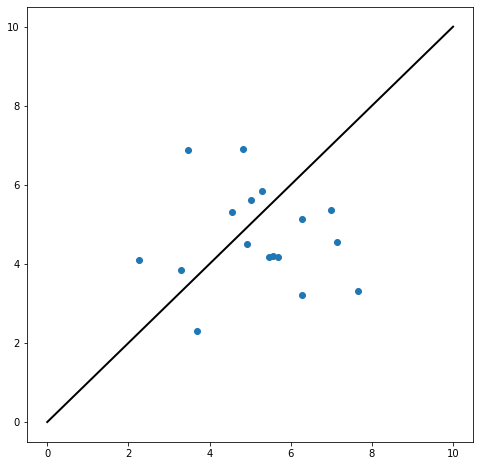

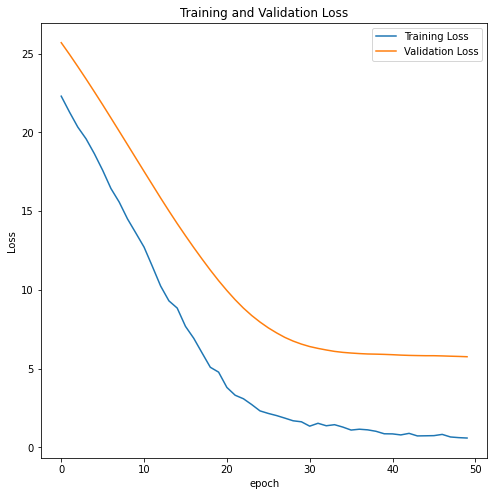

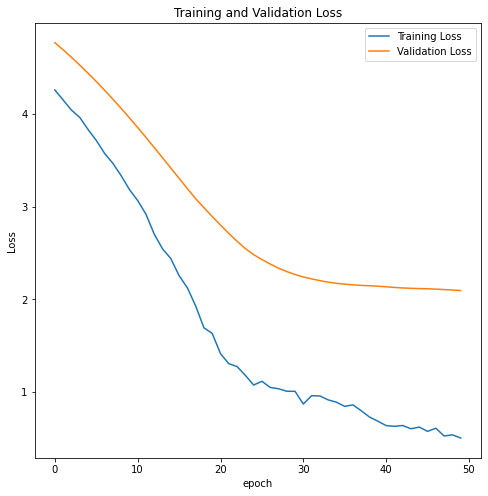

------------------------------------------------------------------------
Training for fold 3, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 12s 231ms/sample - loss: 21.4851 - mean_absolute_error: 4.2379 - val_loss: 26.3698 - val_mean_absolute_error: 4.8595
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.3908 - mean_absolute_error: 4.1182 - val_loss: 25.6233 - val_mean_absolute_error: 4.7845
Epoch 3/50
52/52 [==============================] - 0s 5ms/sample - loss: 19.5698 - mean_absolute_error: 4.0289 - val_loss: 24.8581 - val_mean_absolute_error: 4.7063
Epoch 4/50
52/52 [==============================] - 0s 5ms/sample - loss: 18.7734 - mean_absolute_error: 3.9260 - val_loss: 24.0676 - val_mean_absolute_error: 4.6242
Epoch 5/50
52/52 [==============================] - 0s 5ms/sample - loss: 17.7345 - mean_absolute_error: 3.8072 - val_loss: 23.2615 - val_mean_absolute_error: 4.5388
Epoch 6/50
52/52

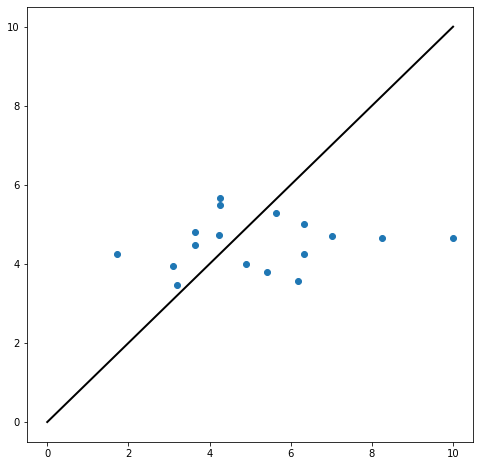

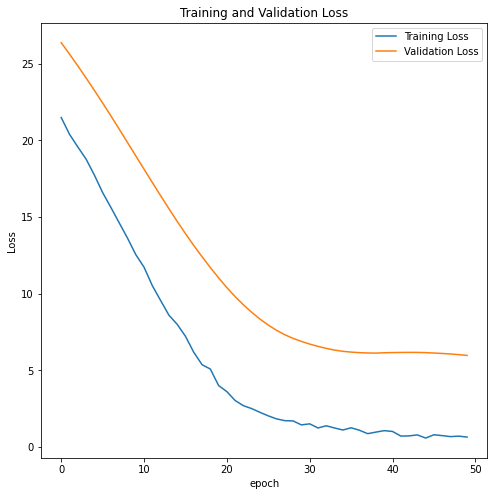

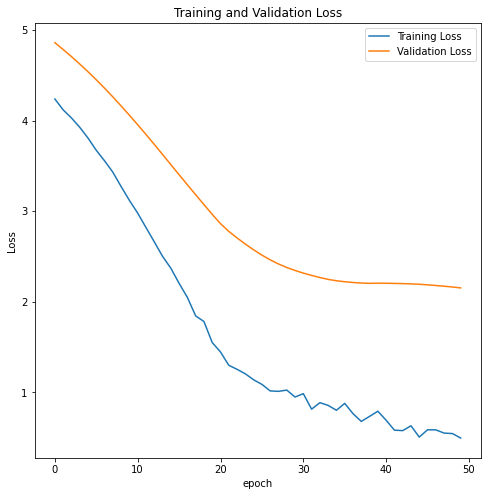

------------------------------------------------------------------------
Training for fold 4, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 12s 220ms/sample - loss: 22.6805 - mean_absolute_error: 4.3646 - val_loss: 24.2072 - val_mean_absolute_error: 4.5889
Epoch 2/50
53/53 [==============================] - 0s 5ms/sample - loss: 21.6728 - mean_absolute_error: 4.2590 - val_loss: 23.5259 - val_mean_absolute_error: 4.5159
Epoch 3/50
53/53 [==============================] - 0s 5ms/sample - loss: 20.7836 - mean_absolute_error: 4.1513 - val_loss: 22.8179 - val_mean_absolute_error: 4.4392
Epoch 4/50
53/53 [==============================] - 0s 5ms/sample - loss: 19.9165 - mean_absolute_error: 4.0498 - val_loss: 22.0899 - val_mean_absolute_error: 4.3592
Epoch 5/50
53/53 [==============================] - 0s 6ms/sample - loss: 18.9743 - mean_absolute_error: 3.9501 - val_loss: 21.3477 - val_mean_absolute_error: 4.2763
Epoch 6/50
53/53

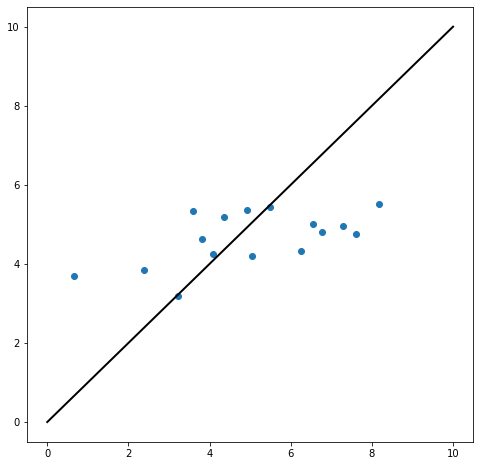

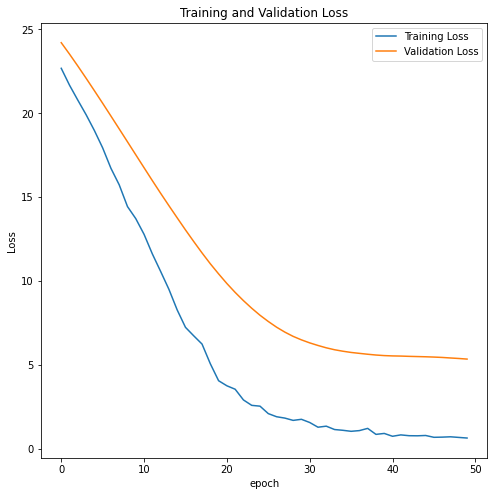

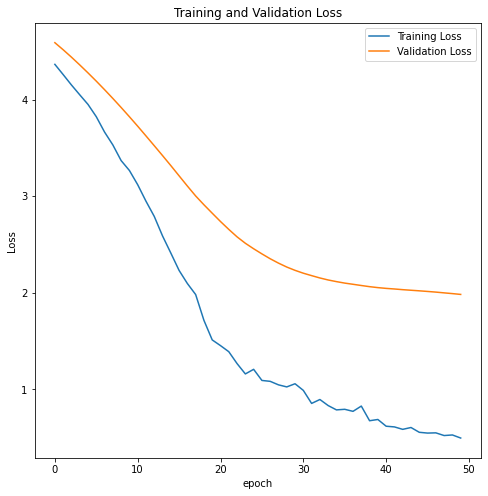

------------------------------------------------------------------------
Training for fold 5, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 12s 221ms/sample - loss: 21.2253 - mean_absolute_error: 4.1786 - val_loss: 24.5567 - val_mean_absolute_error: 4.7729
Epoch 2/50
53/53 [==============================] - 0s 5ms/sample - loss: 20.2015 - mean_absolute_error: 4.0611 - val_loss: 23.8140 - val_mean_absolute_error: 4.6947
Epoch 3/50
53/53 [==============================] - 0s 5ms/sample - loss: 19.4367 - mean_absolute_error: 3.9685 - val_loss: 23.0830 - val_mean_absolute_error: 4.6165
Epoch 4/50
53/53 [==============================] - 0s 5ms/sample - loss: 18.6892 - mean_absolute_error: 3.8782 - val_loss: 22.3212 - val_mean_absolute_error: 4.5334
Epoch 5/50
53/53 [==============================] - 0s 5ms/sample - loss: 17.6074 - mean_absolute_error: 3.7665 - val_loss: 21.5523 - val_mean_absolute_error: 4.4482
Epoch 6/50
53/53

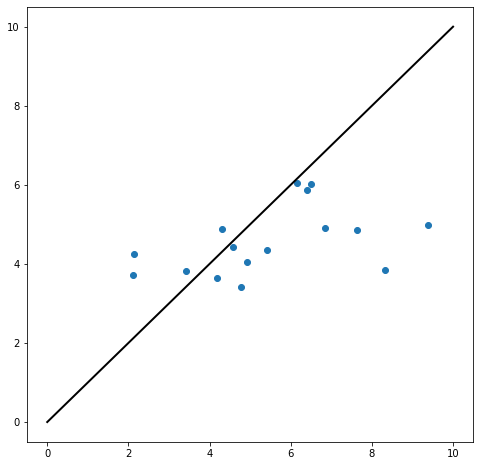

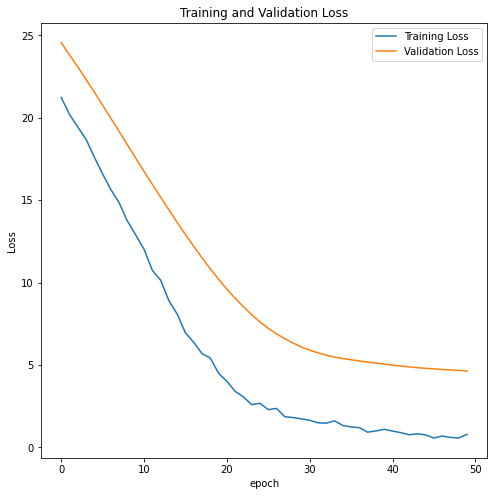

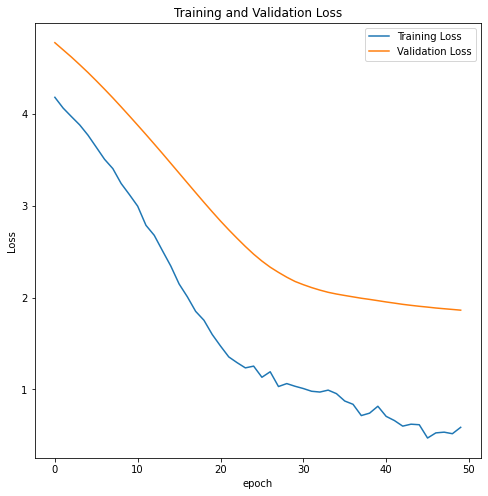

Overall spearman correlation: 0.252
------------------------------------------------------------------------
Training for fold 1, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 12s 228ms/sample - loss: 23.3134 - mean_absolute_error: 4.3966 - val_loss: 21.5901 - val_mean_absolute_error: 4.4198
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 22.3476 - mean_absolute_error: 4.2973 - val_loss: 20.8904 - val_mean_absolute_error: 4.3427
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 21.3094 - mean_absolute_error: 4.1808 - val_loss: 20.1703 - val_mean_absolute_error: 4.2619
Epoch 4/50
52/52 [==============================] - 0s 5ms/sample - loss: 20.3509 - mean_absolute_error: 4.0781 - val_loss: 19.4392 - val_mean_absolute_error: 4.1786
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.2759 - mean_absolute_error: 3.9515 - val_loss: 18.6895 - val_mean_abs

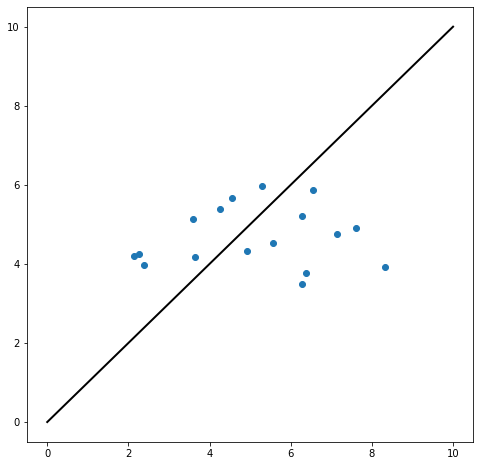

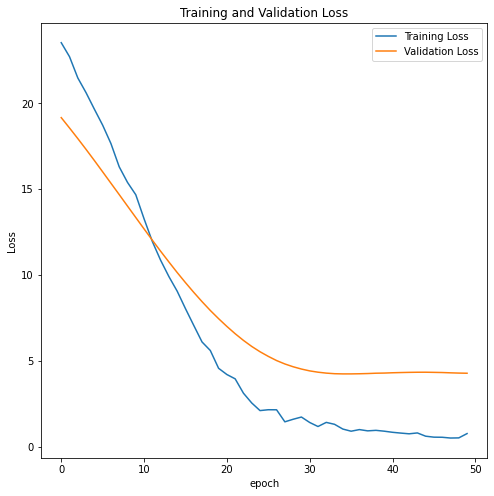

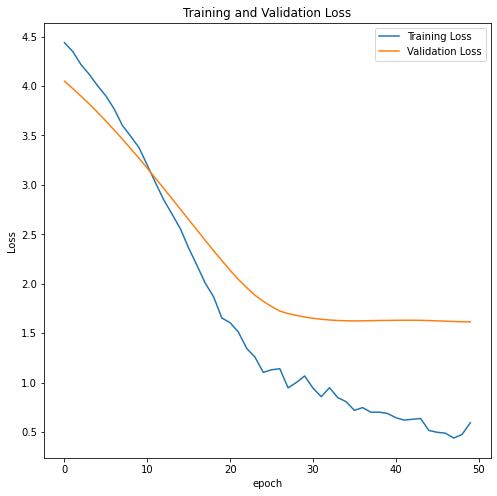

------------------------------------------------------------------------
Training for fold 2, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 12s 233ms/sample - loss: 22.5824 - mean_absolute_error: 4.3101 - val_loss: 23.7254 - val_mean_absolute_error: 4.5405
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 21.7486 - mean_absolute_error: 4.2201 - val_loss: 23.0555 - val_mean_absolute_error: 4.4689
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.7590 - mean_absolute_error: 4.1172 - val_loss: 22.3731 - val_mean_absolute_error: 4.3945
Epoch 4/50
52/52 [==============================] - 0s 5ms/sample - loss: 19.7243 - mean_absolute_error: 3.9923 - val_loss: 21.6640 - val_mean_absolute_error: 4.3162
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 18.8668 - mean_absolute_error: 3.8984 - val_loss: 20.9338 - val_mean_absolute_error: 4.2343
Epoch 6/50
52/52

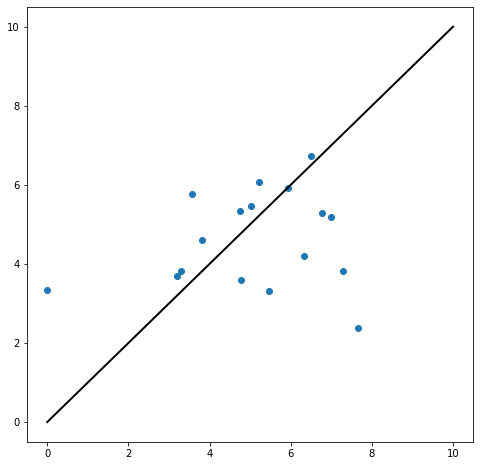

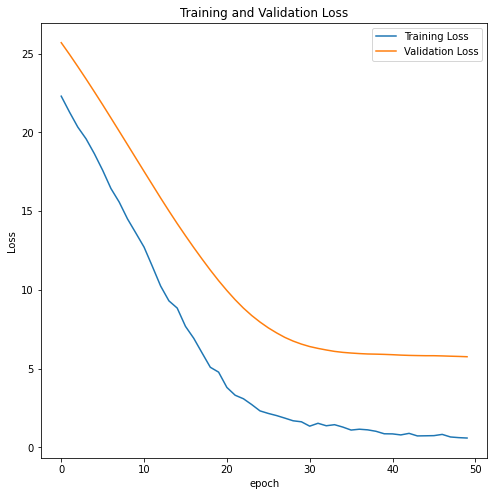

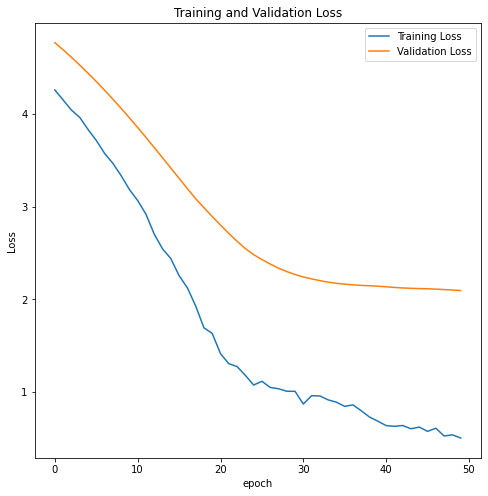

------------------------------------------------------------------------
Training for fold 3, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 12s 230ms/sample - loss: 21.0094 - mean_absolute_error: 4.1797 - val_loss: 26.6439 - val_mean_absolute_error: 4.9063
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.2528 - mean_absolute_error: 4.0883 - val_loss: 25.8974 - val_mean_absolute_error: 4.8313
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.1553 - mean_absolute_error: 3.9663 - val_loss: 25.1201 - val_mean_absolute_error: 4.7520
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 18.6151 - mean_absolute_error: 3.9042 - val_loss: 24.3284 - val_mean_absolute_error: 4.6698
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 17.5296 - mean_absolute_error: 3.7666 - val_loss: 23.5096 - val_mean_absolute_error: 4.5835
Epoch 6/50
52/52

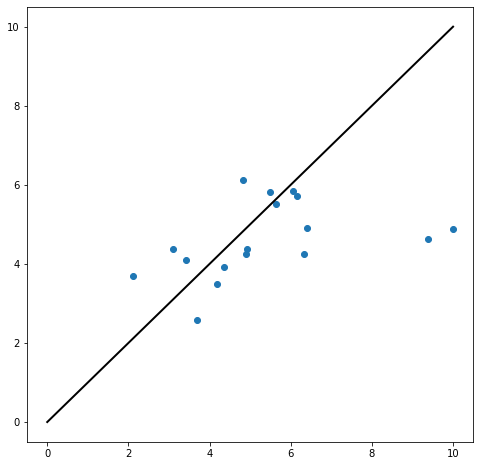

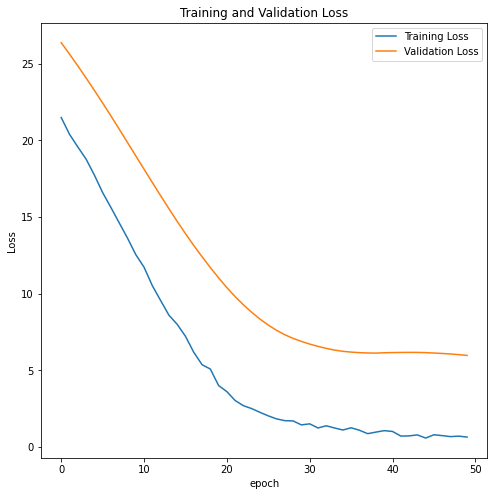

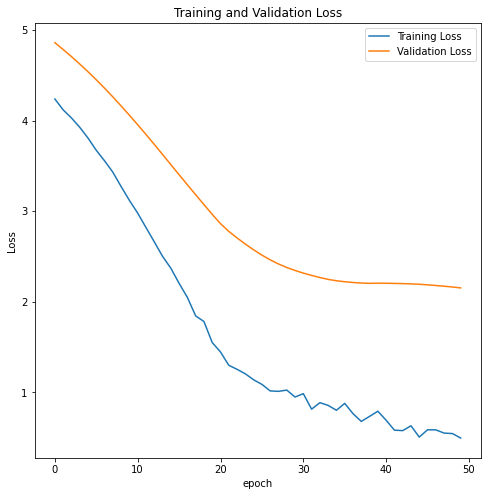

------------------------------------------------------------------------
Training for fold 4, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 12s 225ms/sample - loss: 22.1343 - mean_absolute_error: 4.3239 - val_loss: 22.6650 - val_mean_absolute_error: 4.4878
Epoch 2/50
53/53 [==============================] - 0s 5ms/sample - loss: 21.1863 - mean_absolute_error: 4.2287 - val_loss: 21.9932 - val_mean_absolute_error: 4.4126
Epoch 3/50
53/53 [==============================] - 0s 5ms/sample - loss: 20.4416 - mean_absolute_error: 4.1427 - val_loss: 21.3112 - val_mean_absolute_error: 4.3349
Epoch 4/50
53/53 [==============================] - 0s 5ms/sample - loss: 19.1901 - mean_absolute_error: 4.0004 - val_loss: 20.6095 - val_mean_absolute_error: 4.2536
Epoch 5/50
53/53 [==============================] - 0s 5ms/sample - loss: 18.4604 - mean_absolute_error: 3.9079 - val_loss: 19.8937 - val_mean_absolute_error: 4.1692
Epoch 6/50
53/53

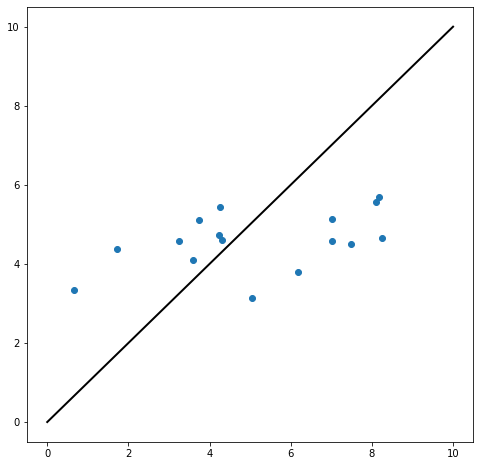

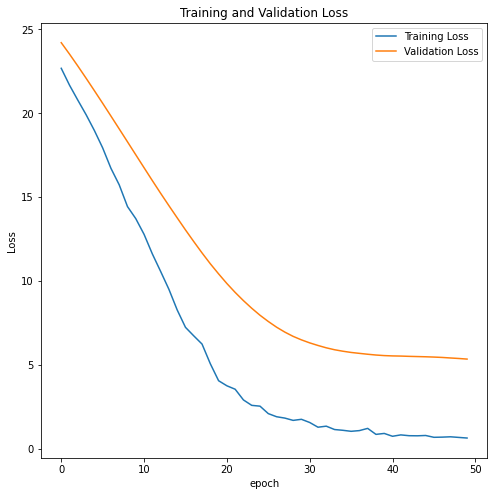

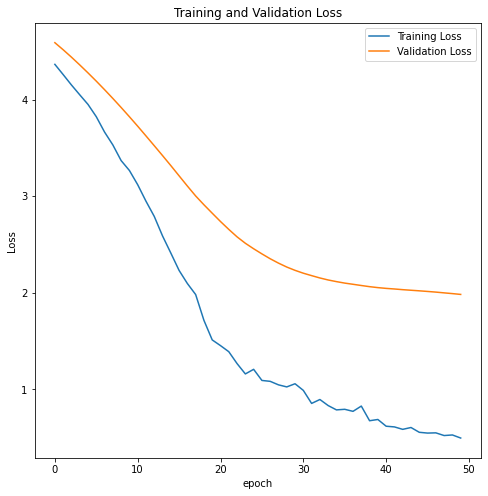

------------------------------------------------------------------------
Training for fold 5, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 13s 248ms/sample - loss: 22.1062 - mean_absolute_error: 4.2510 - val_loss: 25.7222 - val_mean_absolute_error: 4.7459
Epoch 2/50
53/53 [==============================] - 0s 6ms/sample - loss: 21.3195 - mean_absolute_error: 4.1640 - val_loss: 25.0090 - val_mean_absolute_error: 4.6715
Epoch 3/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.4491 - mean_absolute_error: 4.0693 - val_loss: 24.2770 - val_mean_absolute_error: 4.5936
Epoch 4/50
53/53 [==============================] - 0s 6ms/sample - loss: 19.3079 - mean_absolute_error: 3.9341 - val_loss: 23.5239 - val_mean_absolute_error: 4.5120
Epoch 5/50
53/53 [==============================] - 0s 5ms/sample - loss: 18.4125 - mean_absolute_error: 3.8354 - val_loss: 22.7513 - val_mean_absolute_error: 4.4269
Epoch 6/50
53/53

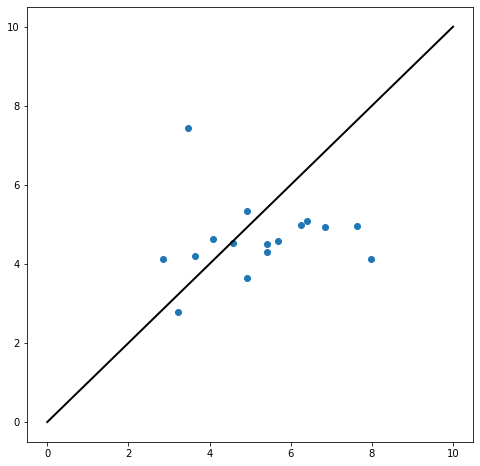

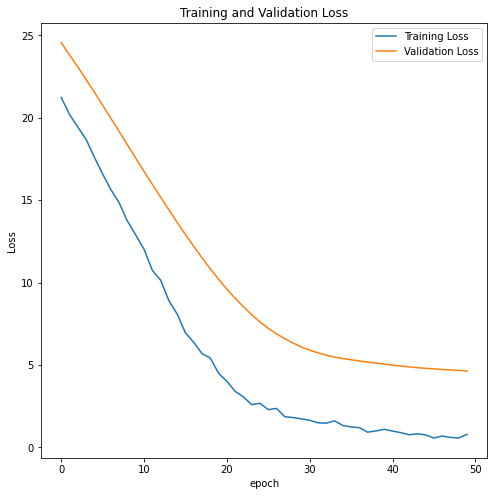

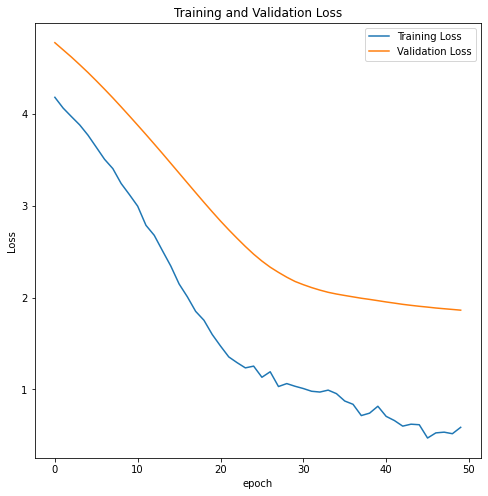

Overall spearman correlation: 0.279
------------------------------------------------------------------------
Training for fold 1, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 12s 233ms/sample - loss: 21.6825 - mean_absolute_error: 4.2678 - val_loss: 25.0320 - val_mean_absolute_error: 4.6832
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.9115 - mean_absolute_error: 4.1805 - val_loss: 24.3384 - val_mean_absolute_error: 4.6103
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.9435 - mean_absolute_error: 4.0757 - val_loss: 23.6360 - val_mean_absolute_error: 4.5355
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 18.8377 - mean_absolute_error: 3.9512 - val_loss: 22.9033 - val_mean_absolute_error: 4.4566
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 17.7372 - mean_absolute_error: 3.8249 - val_loss: 22.1455 - val_mean_abs

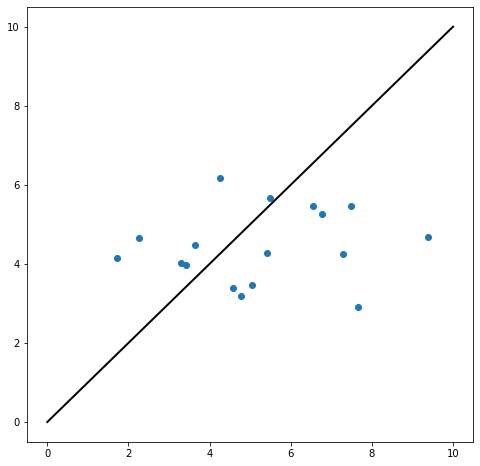

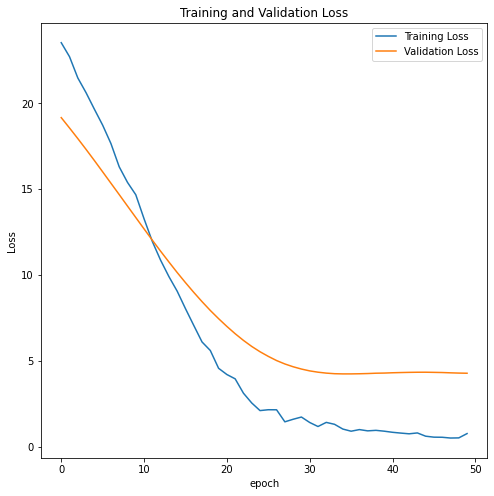

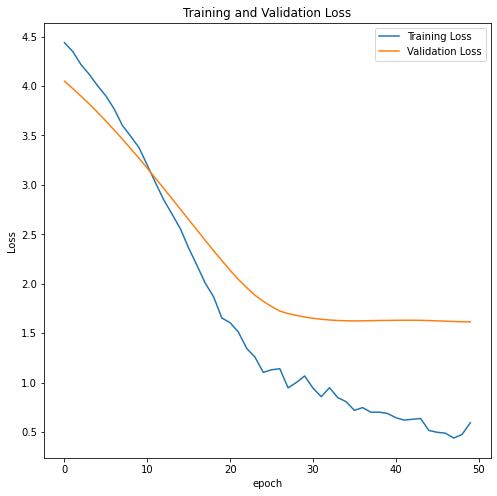

------------------------------------------------------------------------
Training for fold 2, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 12s 233ms/sample - loss: 23.3518 - mean_absolute_error: 4.3605 - val_loss: 20.7105 - val_mean_absolute_error: 4.2220
Epoch 2/50
52/52 [==============================] - 0s 5ms/sample - loss: 22.1361 - mean_absolute_error: 4.2392 - val_loss: 20.0612 - val_mean_absolute_error: 4.1450
Epoch 3/50
52/52 [==============================] - 0s 5ms/sample - loss: 21.1042 - mean_absolute_error: 4.1229 - val_loss: 19.3988 - val_mean_absolute_error: 4.0650
Epoch 4/50
52/52 [==============================] - 0s 5ms/sample - loss: 20.2294 - mean_absolute_error: 4.0318 - val_loss: 18.7242 - val_mean_absolute_error: 3.9821
Epoch 5/50
52/52 [==============================] - 0s 5ms/sample - loss: 19.3400 - mean_absolute_error: 3.9291 - val_loss: 18.0275 - val_mean_absolute_error: 3.8950
Epoch 6/50
52/52

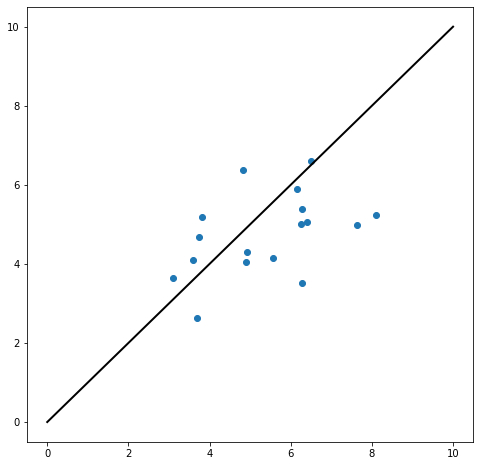

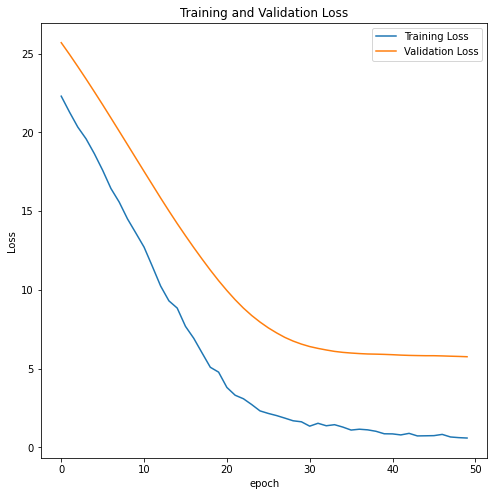

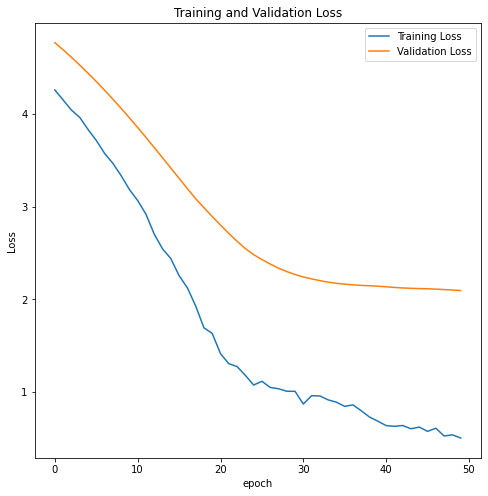

------------------------------------------------------------------------
Training for fold 3, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 12s 237ms/sample - loss: 21.7271 - mean_absolute_error: 4.2787 - val_loss: 25.3484 - val_mean_absolute_error: 4.7367
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.5735 - mean_absolute_error: 4.1507 - val_loss: 24.6407 - val_mean_absolute_error: 4.6641
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.9673 - mean_absolute_error: 4.0780 - val_loss: 23.9130 - val_mean_absolute_error: 4.5883
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 18.8859 - mean_absolute_error: 3.9570 - val_loss: 23.1662 - val_mean_absolute_error: 4.5095
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 17.8159 - mean_absolute_error: 3.8239 - val_loss: 22.3958 - val_mean_absolute_error: 4.4268
Epoch 6/50
52/52

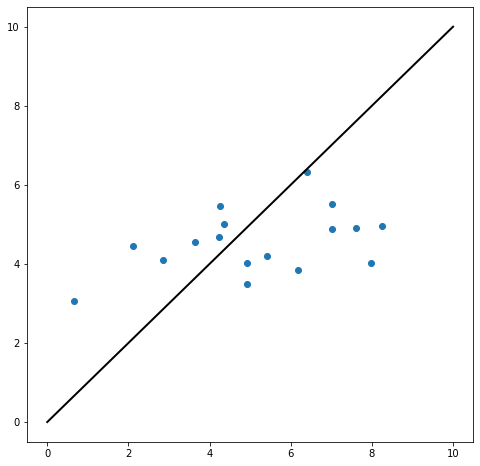

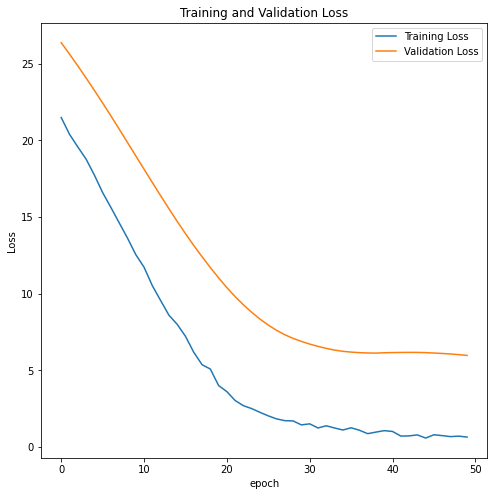

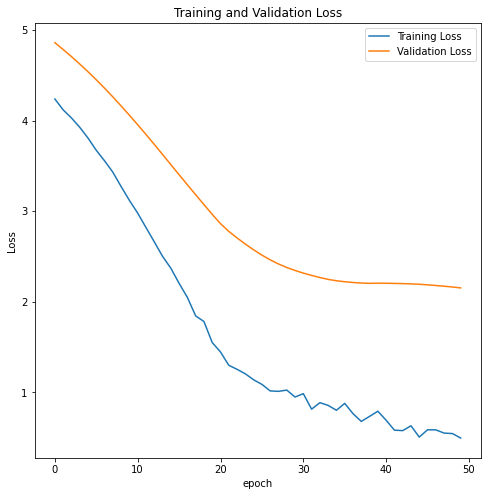

------------------------------------------------------------------------
Training for fold 4, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 12s 232ms/sample - loss: 23.4409 - mean_absolute_error: 4.4213 - val_loss: 21.2786 - val_mean_absolute_error: 4.3369
Epoch 2/50
53/53 [==============================] - 0s 6ms/sample - loss: 22.5428 - mean_absolute_error: 4.3231 - val_loss: 20.6212 - val_mean_absolute_error: 4.2640
Epoch 3/50
53/53 [==============================] - 0s 6ms/sample - loss: 21.5843 - mean_absolute_error: 4.2157 - val_loss: 19.9440 - val_mean_absolute_error: 4.1877
Epoch 4/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.4163 - mean_absolute_error: 4.0847 - val_loss: 19.2484 - val_mean_absolute_error: 4.1078
Epoch 5/50
53/53 [==============================] - 0s 6ms/sample - loss: 19.6262 - mean_absolute_error: 3.9833 - val_loss: 18.5433 - val_mean_absolute_error: 4.0255
Epoch 6/50
53/53

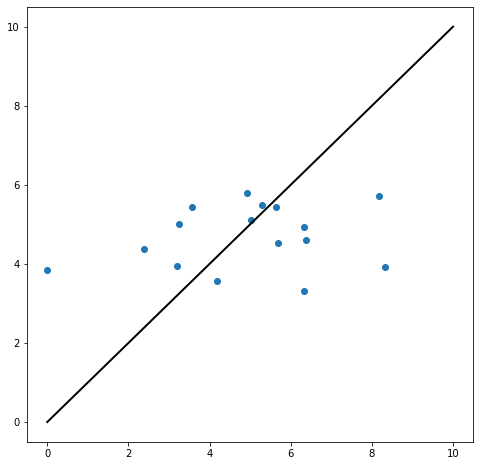

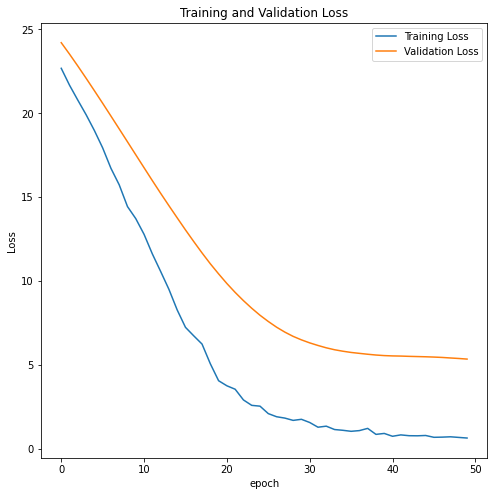

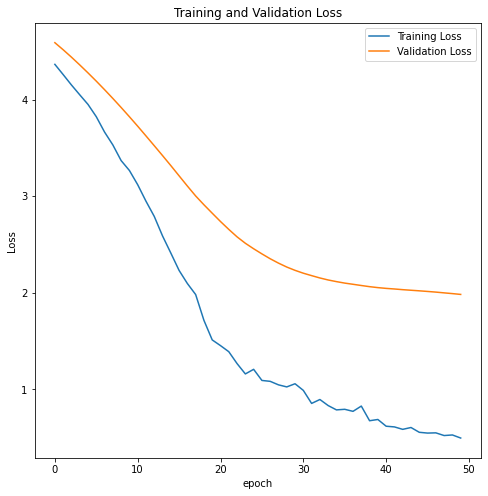

------------------------------------------------------------------------
Training for fold 5, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 13s 236ms/sample - loss: 21.1124 - mean_absolute_error: 4.1657 - val_loss: 27.6031 - val_mean_absolute_error: 5.0577
Epoch 2/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.4736 - mean_absolute_error: 4.0805 - val_loss: 26.8019 - val_mean_absolute_error: 4.9777
Epoch 3/50
53/53 [==============================] - 0s 6ms/sample - loss: 19.4018 - mean_absolute_error: 3.9632 - val_loss: 25.9909 - val_mean_absolute_error: 4.8955
Epoch 4/50
53/53 [==============================] - 0s 6ms/sample - loss: 18.4209 - mean_absolute_error: 3.8677 - val_loss: 25.1483 - val_mean_absolute_error: 4.8084
Epoch 5/50
53/53 [==============================] - 0s 6ms/sample - loss: 17.5646 - mean_absolute_error: 3.7475 - val_loss: 24.2830 - val_mean_absolute_error: 4.7174
Epoch 6/50
53/53

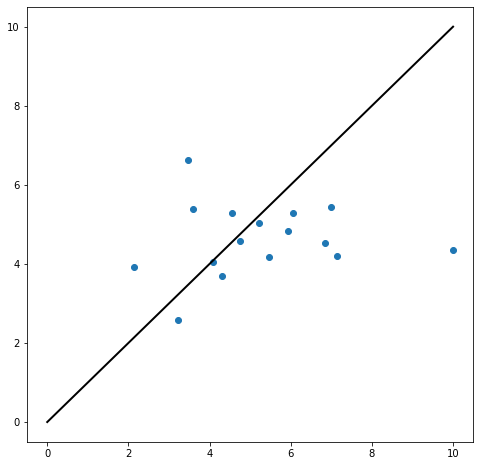

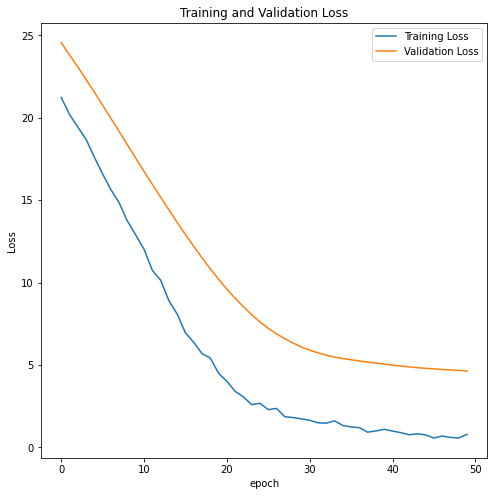

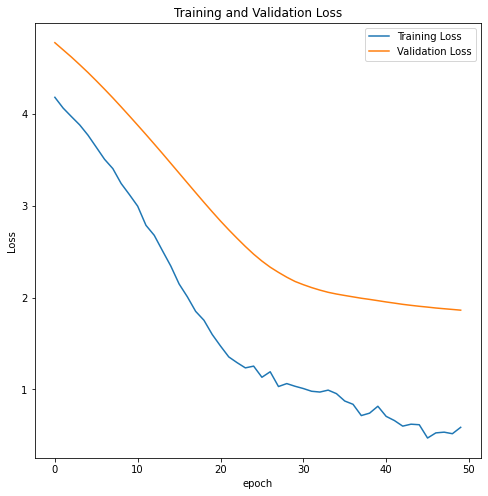

Overall spearman correlation: 0.274
------------------------------------------------------------------------
Training for fold 1, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 12s 238ms/sample - loss: 23.0035 - mean_absolute_error: 4.3832 - val_loss: 21.3463 - val_mean_absolute_error: 4.2935
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 22.2604 - mean_absolute_error: 4.2998 - val_loss: 20.7390 - val_mean_absolute_error: 4.2226
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.8944 - mean_absolute_error: 4.1493 - val_loss: 20.1106 - val_mean_absolute_error: 4.1483
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.4200 - mean_absolute_error: 4.0845 - val_loss: 19.4697 - val_mean_absolute_error: 4.0711
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.2748 - mean_absolute_error: 3.9529 - val_loss: 18.8096 - val_mean_abs

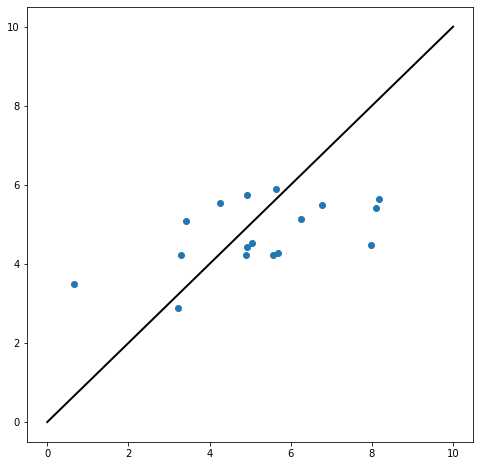

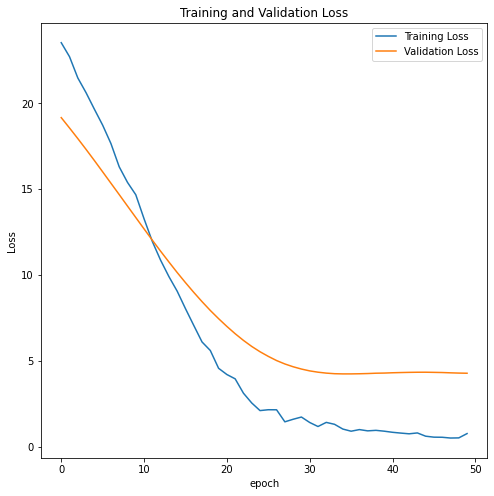

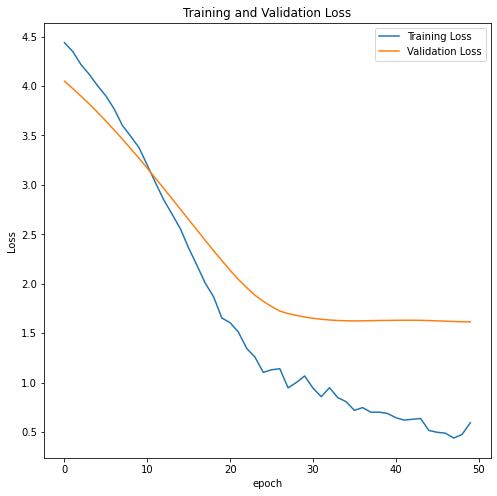

------------------------------------------------------------------------
Training for fold 2, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 13s 241ms/sample - loss: 21.8745 - mean_absolute_error: 4.2087 - val_loss: 22.6909 - val_mean_absolute_error: 4.5087
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.9523 - mean_absolute_error: 4.1147 - val_loss: 21.9801 - val_mean_absolute_error: 4.4315
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.8645 - mean_absolute_error: 3.9856 - val_loss: 21.2537 - val_mean_absolute_error: 4.3514
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.0698 - mean_absolute_error: 3.9001 - val_loss: 20.5070 - val_mean_absolute_error: 4.2675
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 18.2714 - mean_absolute_error: 3.7954 - val_loss: 19.7492 - val_mean_absolute_error: 4.1807
Epoch 6/50
52/52

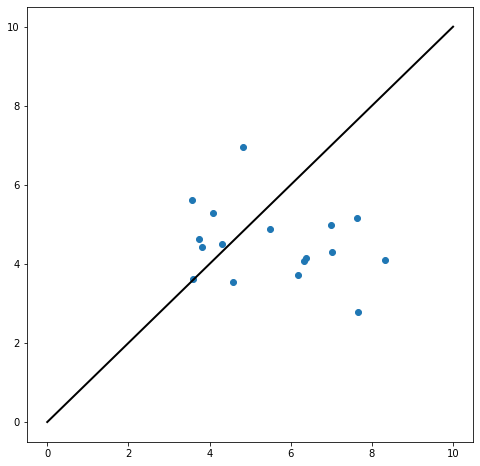

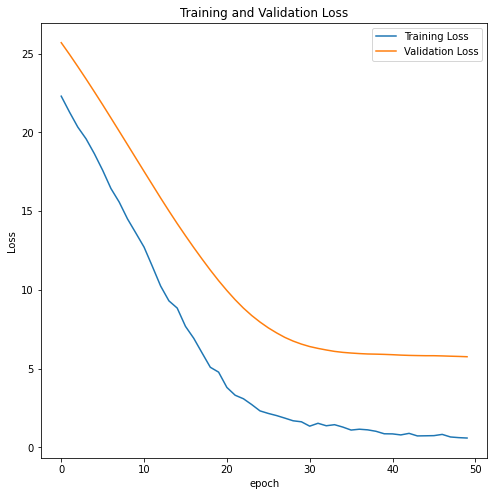

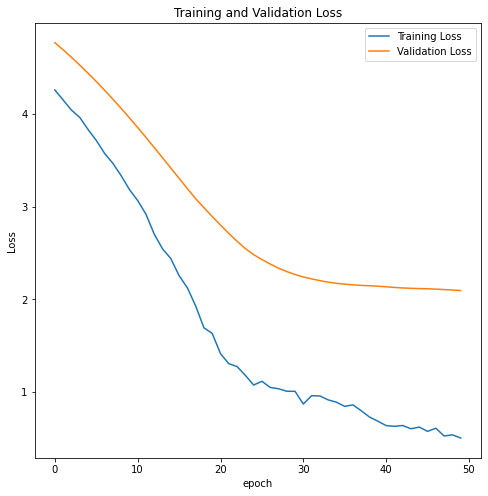

------------------------------------------------------------------------
Training for fold 3, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 13s 243ms/sample - loss: 22.1114 - mean_absolute_error: 4.3167 - val_loss: 25.7047 - val_mean_absolute_error: 4.8451
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 21.4139 - mean_absolute_error: 4.2445 - val_loss: 24.9721 - val_mean_absolute_error: 4.7695
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.3278 - mean_absolute_error: 4.1225 - val_loss: 24.2241 - val_mean_absolute_error: 4.6915
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.3668 - mean_absolute_error: 4.0051 - val_loss: 23.4486 - val_mean_absolute_error: 4.6092
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 18.3746 - mean_absolute_error: 3.8994 - val_loss: 22.6470 - val_mean_absolute_error: 4.5228
Epoch 6/50
52/52

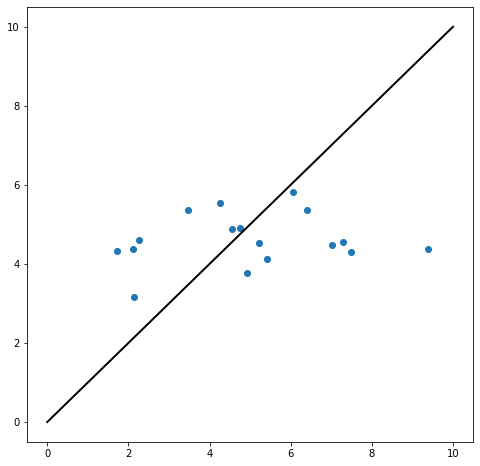

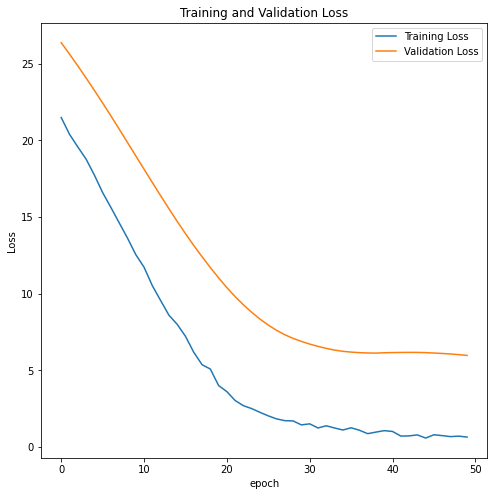

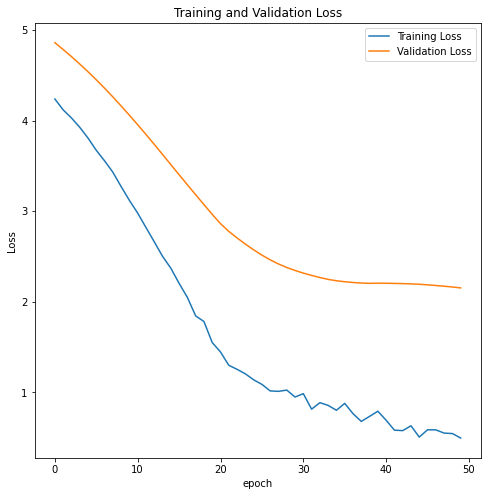

------------------------------------------------------------------------
Training for fold 4, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 13s 239ms/sample - loss: 22.5911 - mean_absolute_error: 4.3348 - val_loss: 25.5684 - val_mean_absolute_error: 4.7534
Epoch 2/50
53/53 [==============================] - 0s 6ms/sample - loss: 21.8205 - mean_absolute_error: 4.2516 - val_loss: 24.8103 - val_mean_absolute_error: 4.6749
Epoch 3/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.8056 - mean_absolute_error: 4.1452 - val_loss: 24.0440 - val_mean_absolute_error: 4.5941
Epoch 4/50
53/53 [==============================] - 0s 6ms/sample - loss: 19.9835 - mean_absolute_error: 4.0384 - val_loss: 23.2556 - val_mean_absolute_error: 4.5098
Epoch 5/50
53/53 [==============================] - 0s 6ms/sample - loss: 18.7762 - mean_absolute_error: 3.8988 - val_loss: 22.4509 - val_mean_absolute_error: 4.4221
Epoch 6/50
53/53

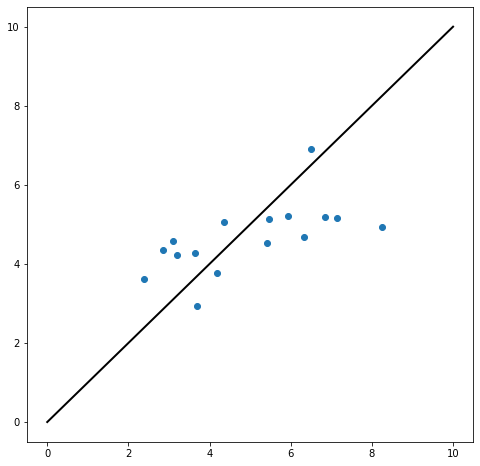

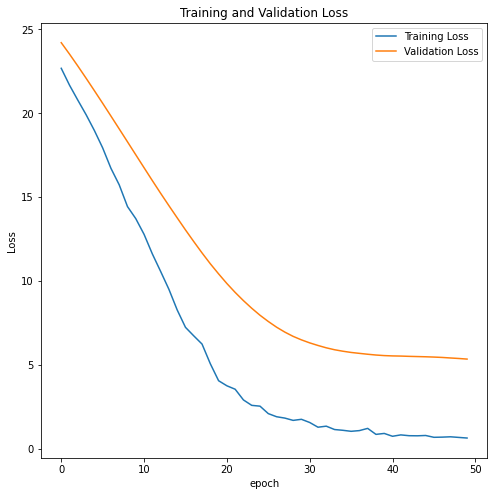

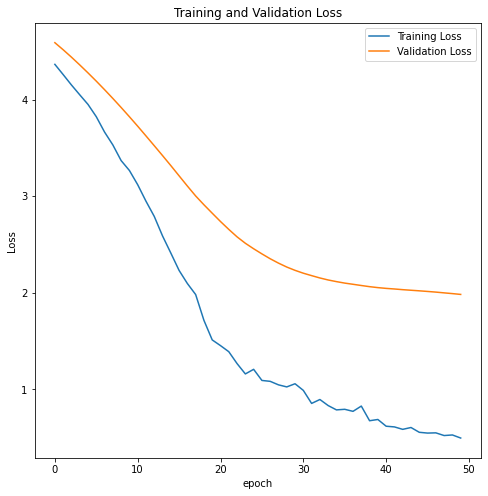

------------------------------------------------------------------------
Training for fold 5, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 13s 241ms/sample - loss: 21.5146 - mean_absolute_error: 4.2184 - val_loss: 25.0045 - val_mean_absolute_error: 4.6964
Epoch 2/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.6858 - mean_absolute_error: 4.1307 - val_loss: 24.2726 - val_mean_absolute_error: 4.6194
Epoch 3/50
53/53 [==============================] - 0s 6ms/sample - loss: 19.6685 - mean_absolute_error: 4.0163 - val_loss: 23.5222 - val_mean_absolute_error: 4.5392
Epoch 4/50
53/53 [==============================] - 0s 6ms/sample - loss: 18.7473 - mean_absolute_error: 3.9120 - val_loss: 22.7425 - val_mean_absolute_error: 4.4544
Epoch 5/50
53/53 [==============================] - 0s 6ms/sample - loss: 17.6795 - mean_absolute_error: 3.7646 - val_loss: 21.9526 - val_mean_absolute_error: 4.3667
Epoch 6/50
53/53

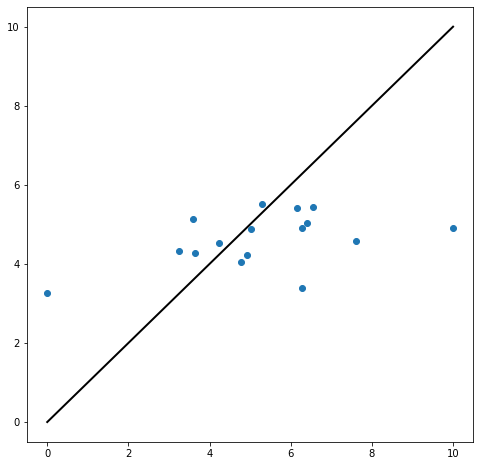

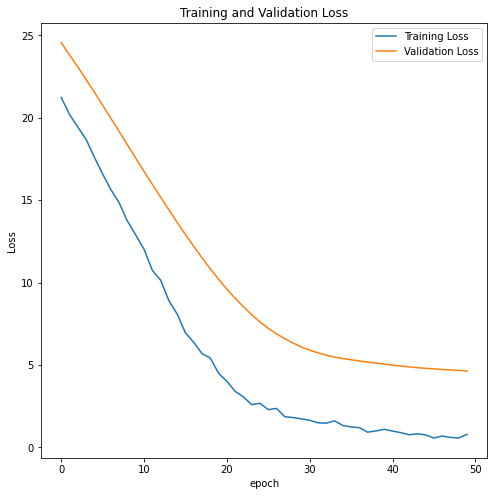

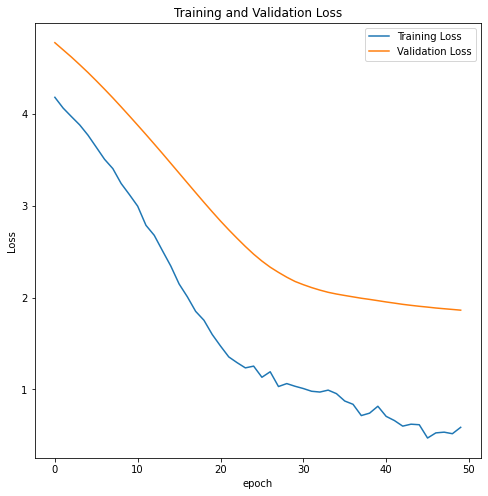

Overall spearman correlation: 0.276
------------------------------------------------------------------------
Training for fold 1, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 13s 248ms/sample - loss: 22.8577 - mean_absolute_error: 4.3406 - val_loss: 26.2611 - val_mean_absolute_error: 4.8752
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 21.8576 - mean_absolute_error: 4.2293 - val_loss: 25.5324 - val_mean_absolute_error: 4.8014
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.9635 - mean_absolute_error: 4.1216 - val_loss: 24.7779 - val_mean_absolute_error: 4.7239
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.0057 - mean_absolute_error: 4.0101 - val_loss: 24.0004 - val_mean_absolute_error: 4.6428
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 18.9790 - mean_absolute_error: 3.8957 - val_loss: 23.2076 - val_mean_abs

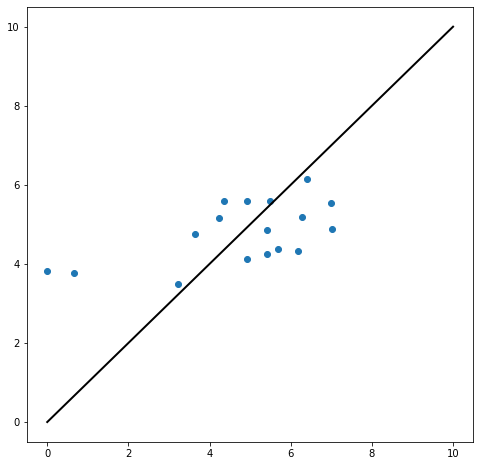

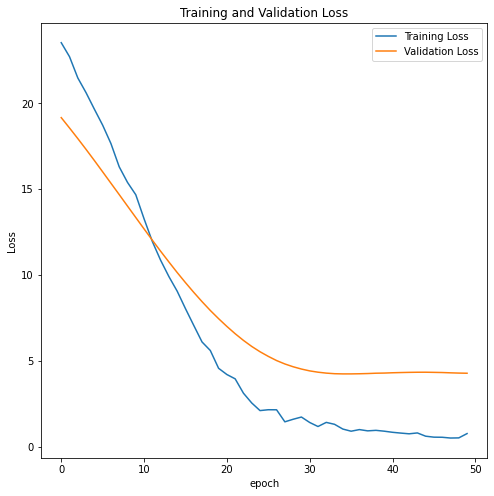

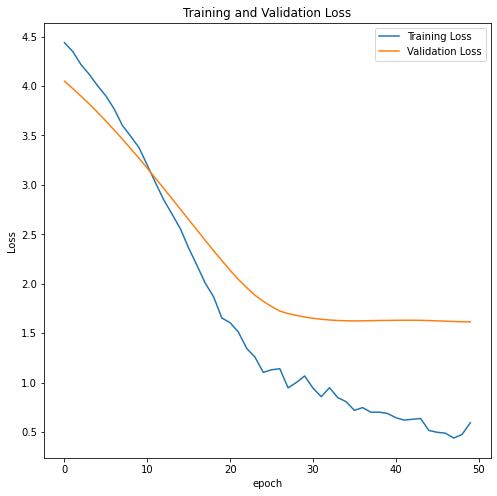

------------------------------------------------------------------------
Training for fold 2, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 13s 248ms/sample - loss: 20.7800 - mean_absolute_error: 4.1840 - val_loss: 25.7138 - val_mean_absolute_error: 4.7884
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.7947 - mean_absolute_error: 4.0754 - val_loss: 24.9585 - val_mean_absolute_error: 4.7118
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.0819 - mean_absolute_error: 3.9887 - val_loss: 24.1839 - val_mean_absolute_error: 4.6323
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 18.1081 - mean_absolute_error: 3.8674 - val_loss: 23.3949 - val_mean_absolute_error: 4.5499
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 16.7270 - mean_absolute_error: 3.7146 - val_loss: 22.5829 - val_mean_absolute_error: 4.4636
Epoch 6/50
52/52

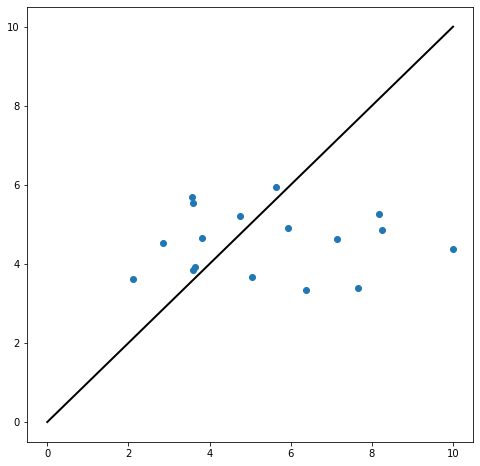

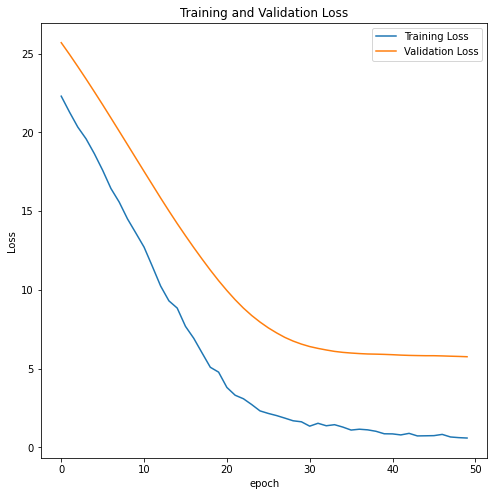

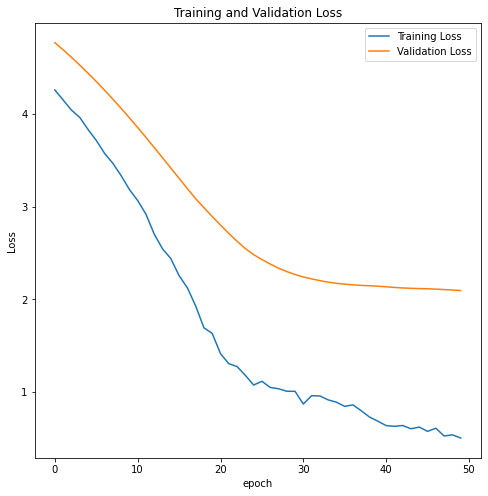

------------------------------------------------------------------------
Training for fold 3, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 13s 253ms/sample - loss: 22.9465 - mean_absolute_error: 4.4154 - val_loss: 24.7099 - val_mean_absolute_error: 4.6998
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 22.0198 - mean_absolute_error: 4.3115 - val_loss: 23.9839 - val_mean_absolute_error: 4.6231
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 21.0260 - mean_absolute_error: 4.2038 - val_loss: 23.2271 - val_mean_absolute_error: 4.5422
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.0613 - mean_absolute_error: 4.0968 - val_loss: 22.4530 - val_mean_absolute_error: 4.4582
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.2315 - mean_absolute_error: 4.0049 - val_loss: 21.6573 - val_mean_absolute_error: 4.3705
Epoch 6/50
52/52

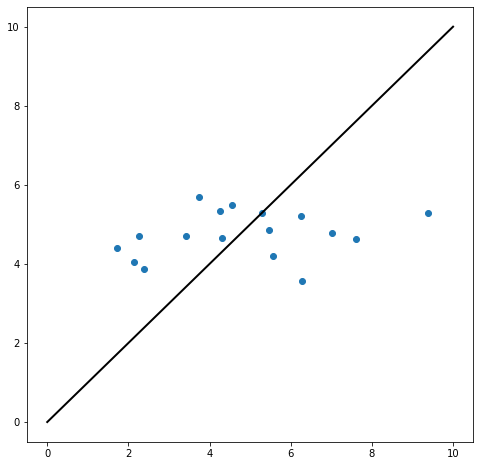

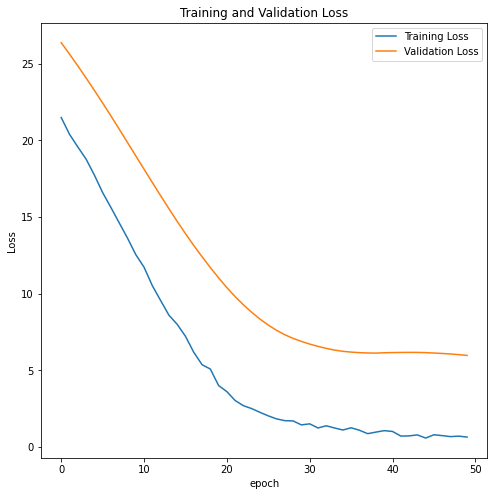

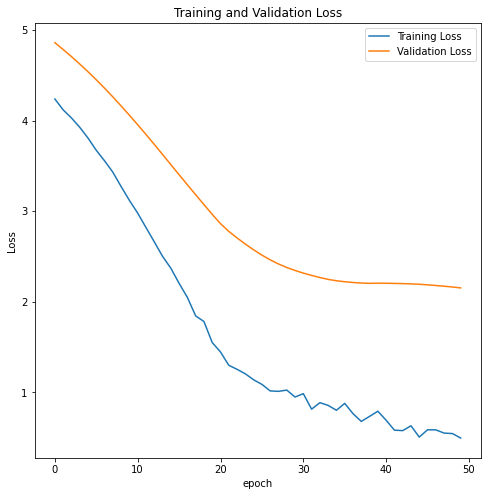

------------------------------------------------------------------------
Training for fold 4, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 13s 246ms/sample - loss: 23.3837 - mean_absolute_error: 4.3838 - val_loss: 21.9469 - val_mean_absolute_error: 4.3095
Epoch 2/50
53/53 [==============================] - 0s 6ms/sample - loss: 22.3827 - mean_absolute_error: 4.2740 - val_loss: 21.2458 - val_mean_absolute_error: 4.2293
Epoch 3/50
53/53 [==============================] - 0s 6ms/sample - loss: 21.2929 - mean_absolute_error: 4.1560 - val_loss: 20.5339 - val_mean_absolute_error: 4.1463
Epoch 4/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.4933 - mean_absolute_error: 4.0692 - val_loss: 19.8079 - val_mean_absolute_error: 4.0599
Epoch 5/50
53/53 [==============================] - 0s 6ms/sample - loss: 19.5571 - mean_absolute_error: 3.9580 - val_loss: 19.0586 - val_mean_absolute_error: 3.9691
Epoch 6/50
53/53

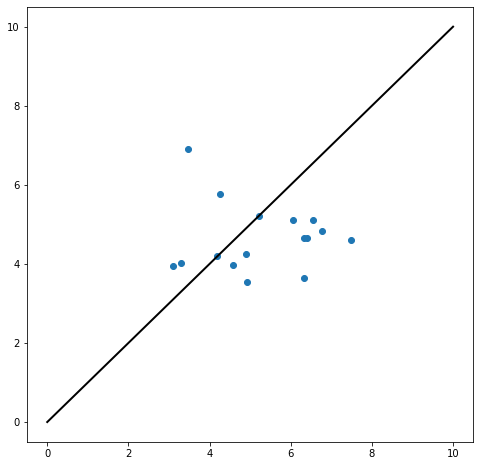

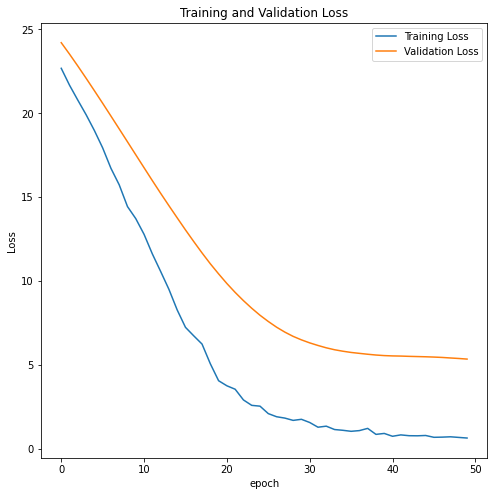

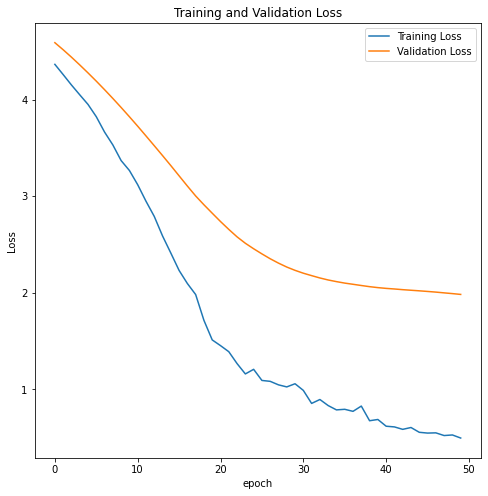

------------------------------------------------------------------------
Training for fold 5, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 14s 264ms/sample - loss: 21.3385 - mean_absolute_error: 4.1556 - val_loss: 21.7574 - val_mean_absolute_error: 4.4412
Epoch 2/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.4704 - mean_absolute_error: 4.0563 - val_loss: 21.1127 - val_mean_absolute_error: 4.3683
Epoch 3/50
53/53 [==============================] - 0s 6ms/sample - loss: 19.6675 - mean_absolute_error: 3.9704 - val_loss: 20.4563 - val_mean_absolute_error: 4.2928
Epoch 4/50
53/53 [==============================] - 0s 6ms/sample - loss: 18.6516 - mean_absolute_error: 3.8589 - val_loss: 19.7833 - val_mean_absolute_error: 4.2139
Epoch 5/50
53/53 [==============================] - 0s 6ms/sample - loss: 17.7952 - mean_absolute_error: 3.7506 - val_loss: 19.0902 - val_mean_absolute_error: 4.1313
Epoch 6/50
53/53

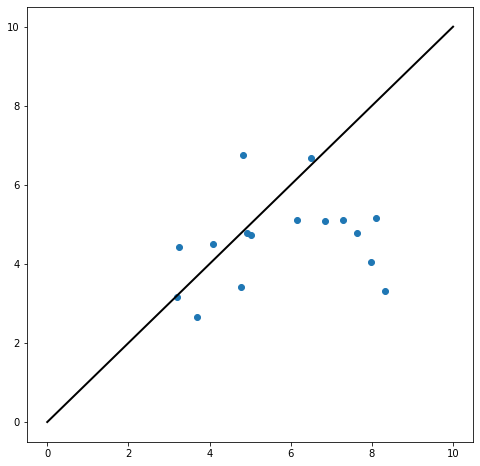

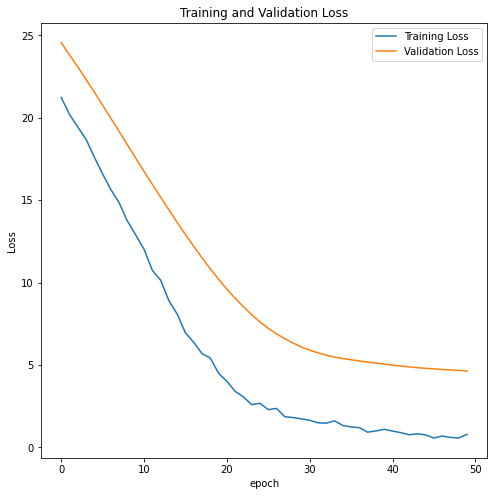

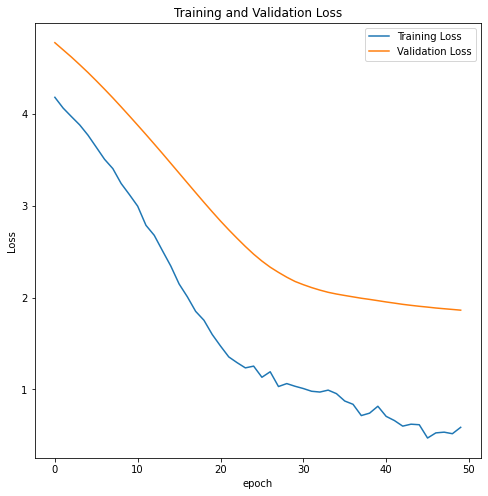

Overall spearman correlation: 0.194
------------------------------------------------------------------------
Training for fold 1, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 13s 254ms/sample - loss: 21.7973 - mean_absolute_error: 4.2796 - val_loss: 26.5982 - val_mean_absolute_error: 4.9026
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 21.0085 - mean_absolute_error: 4.1896 - val_loss: 25.8428 - val_mean_absolute_error: 4.8271
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.1174 - mean_absolute_error: 4.0952 - val_loss: 25.0699 - val_mean_absolute_error: 4.7486
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.0488 - mean_absolute_error: 3.9610 - val_loss: 24.2701 - val_mean_absolute_error: 4.6664
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 18.2788 - mean_absolute_error: 3.8767 - val_loss: 23.4575 - val_mean_abs

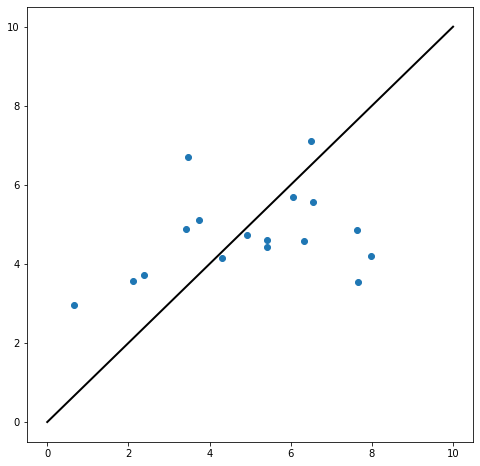

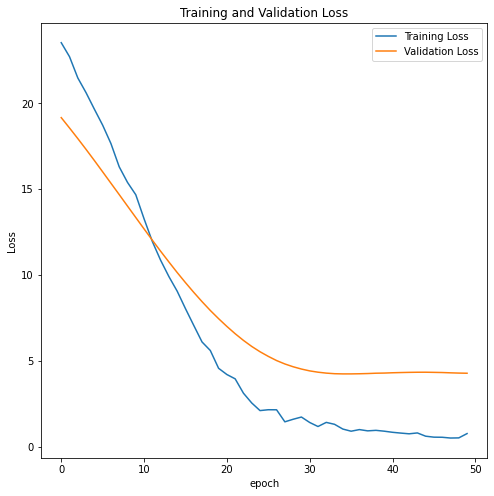

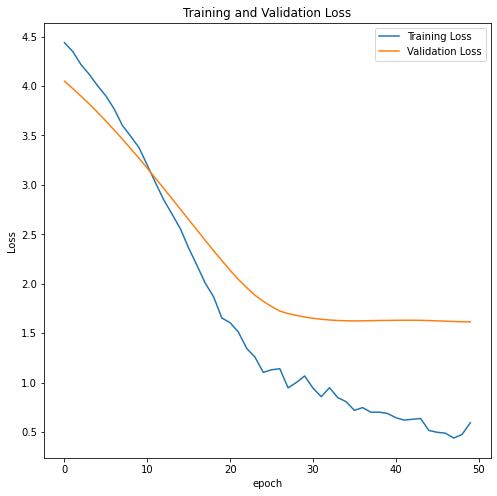

------------------------------------------------------------------------
Training for fold 2, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 13s 258ms/sample - loss: 20.8162 - mean_absolute_error: 4.1191 - val_loss: 23.1039 - val_mean_absolute_error: 4.5084
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.1758 - mean_absolute_error: 4.0392 - val_loss: 22.4288 - val_mean_absolute_error: 4.4336
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.2262 - mean_absolute_error: 3.9297 - val_loss: 21.7365 - val_mean_absolute_error: 4.3555
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 18.2183 - mean_absolute_error: 3.8145 - val_loss: 21.0322 - val_mean_absolute_error: 4.2748
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 17.1874 - mean_absolute_error: 3.6910 - val_loss: 20.3072 - val_mean_absolute_error: 4.1899
Epoch 6/50
52/52

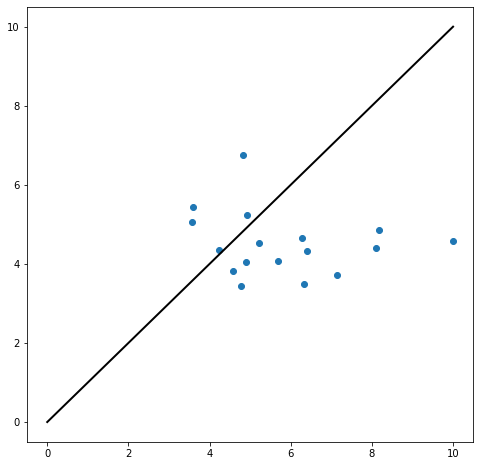

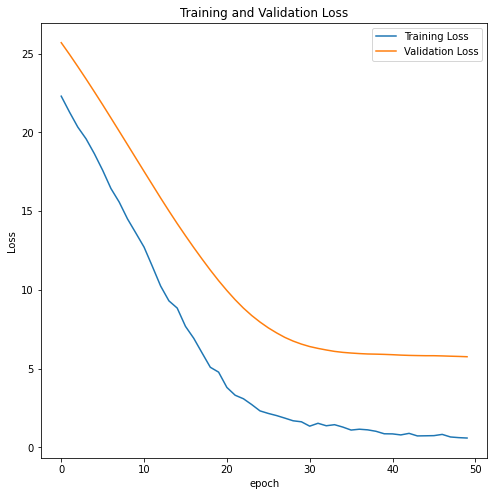

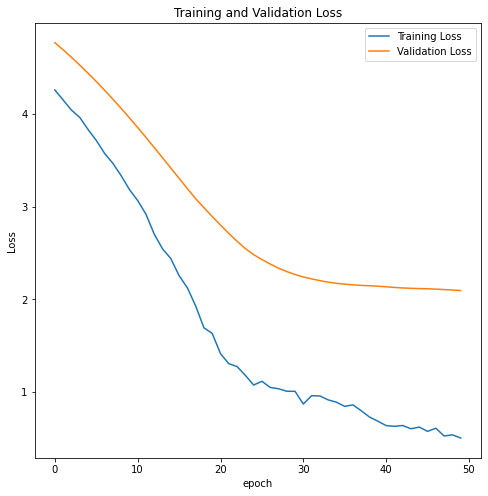

------------------------------------------------------------------------
Training for fold 3, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 13s 257ms/sample - loss: 21.7308 - mean_absolute_error: 4.2640 - val_loss: 24.1171 - val_mean_absolute_error: 4.6709
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 21.0375 - mean_absolute_error: 4.1914 - val_loss: 23.3980 - val_mean_absolute_error: 4.5963
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.0409 - mean_absolute_error: 4.0696 - val_loss: 22.6509 - val_mean_absolute_error: 4.5175
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.1150 - mean_absolute_error: 3.9723 - val_loss: 21.8879 - val_mean_absolute_error: 4.4356
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 18.0315 - mean_absolute_error: 3.8447 - val_loss: 21.1042 - val_mean_absolute_error: 4.3500
Epoch 6/50
52/52

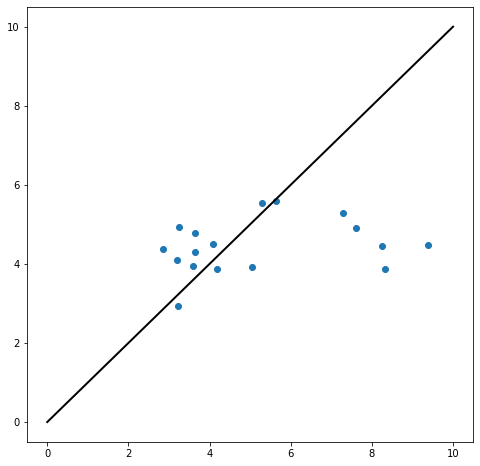

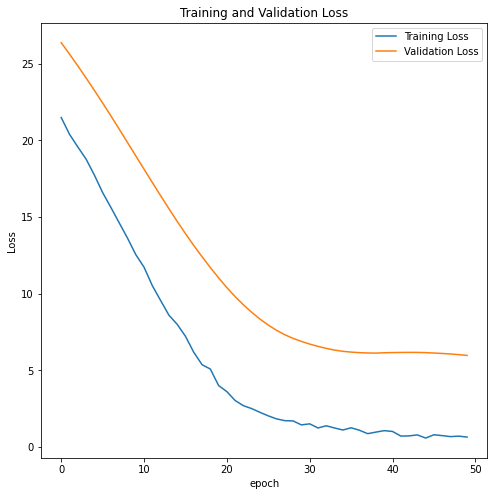

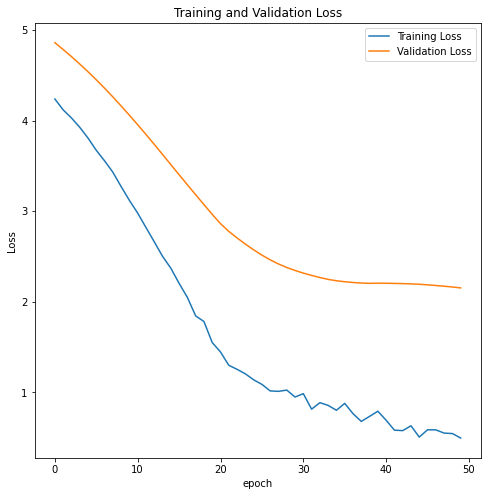

------------------------------------------------------------------------
Training for fold 4, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 13s 254ms/sample - loss: 24.1412 - mean_absolute_error: 4.5430 - val_loss: 20.2747 - val_mean_absolute_error: 4.0406
Epoch 2/50
53/53 [==============================] - 0s 6ms/sample - loss: 23.1742 - mean_absolute_error: 4.4412 - val_loss: 19.6535 - val_mean_absolute_error: 3.9736
Epoch 3/50
53/53 [==============================] - 0s 6ms/sample - loss: 22.2596 - mean_absolute_error: 4.3429 - val_loss: 19.0095 - val_mean_absolute_error: 3.9035
Epoch 4/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.8919 - mean_absolute_error: 4.1883 - val_loss: 18.3506 - val_mean_absolute_error: 3.8301
Epoch 5/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.1936 - mean_absolute_error: 4.0936 - val_loss: 17.6791 - val_mean_absolute_error: 3.7539
Epoch 6/50
53/53

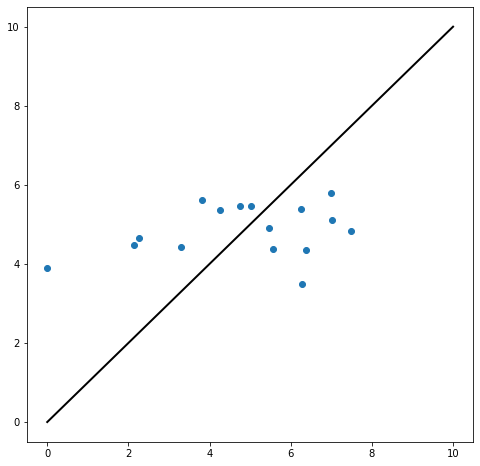

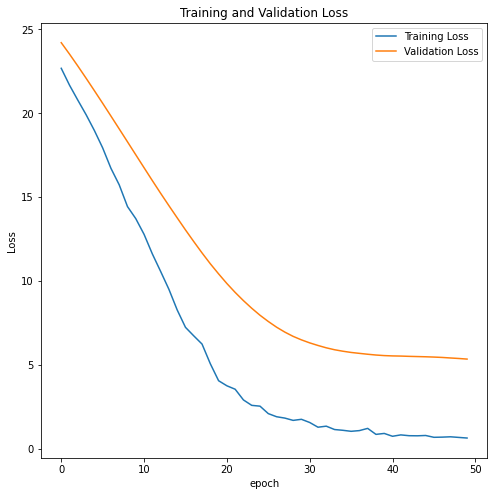

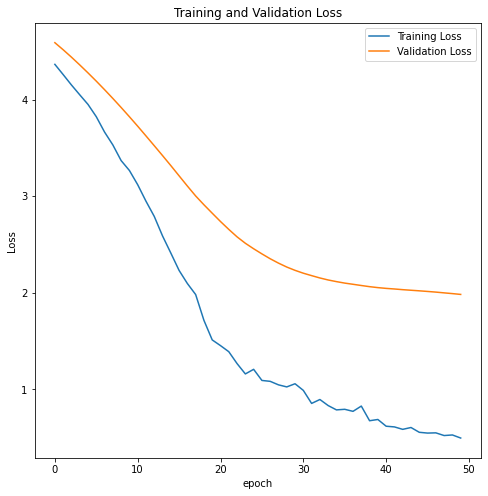

------------------------------------------------------------------------
Training for fold 5, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 14s 271ms/sample - loss: 22.4209 - mean_absolute_error: 4.2741 - val_loss: 25.4572 - val_mean_absolute_error: 4.7474
Epoch 2/50
53/53 [==============================] - 0s 6ms/sample - loss: 21.5260 - mean_absolute_error: 4.1862 - val_loss: 24.7021 - val_mean_absolute_error: 4.6681
Epoch 3/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.6629 - mean_absolute_error: 4.0852 - val_loss: 23.9410 - val_mean_absolute_error: 4.5871
Epoch 4/50
53/53 [==============================] - 0s 6ms/sample - loss: 19.8323 - mean_absolute_error: 3.9913 - val_loss: 23.1430 - val_mean_absolute_error: 4.5007
Epoch 5/50
53/53 [==============================] - 0s 6ms/sample - loss: 18.6755 - mean_absolute_error: 3.8560 - val_loss: 22.3379 - val_mean_absolute_error: 4.4119
Epoch 6/50
53/53

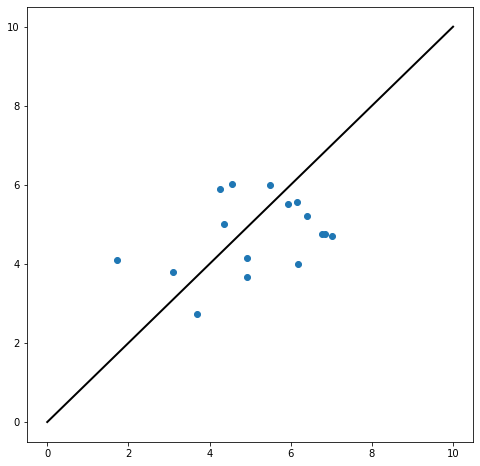

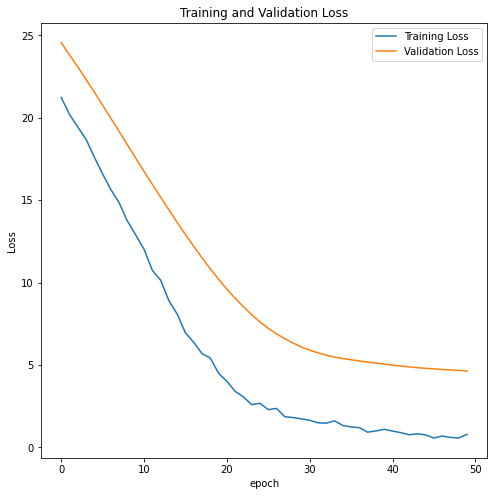

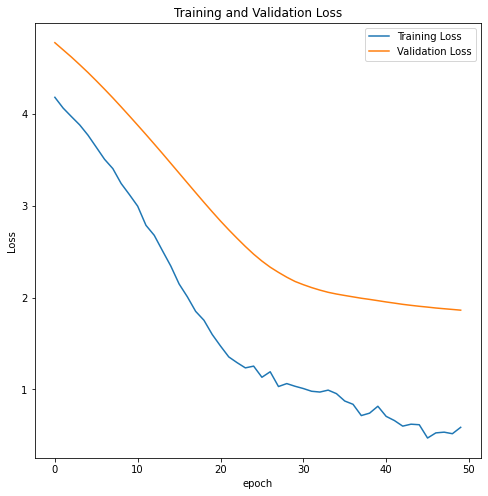

Overall spearman correlation: 0.168
------------------------------------------------------------------------
Training for fold 1, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 14s 264ms/sample - loss: 23.1471 - mean_absolute_error: 4.3993 - val_loss: 21.7444 - val_mean_absolute_error: 4.2778
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 22.3679 - mean_absolute_error: 4.3179 - val_loss: 21.0247 - val_mean_absolute_error: 4.1965
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 21.2413 - mean_absolute_error: 4.2100 - val_loss: 20.2926 - val_mean_absolute_error: 4.1119
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.4616 - mean_absolute_error: 4.1215 - val_loss: 19.5453 - val_mean_absolute_error: 4.0244
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.2791 - mean_absolute_error: 3.9829 - val_loss: 18.7731 - val_mean_abs

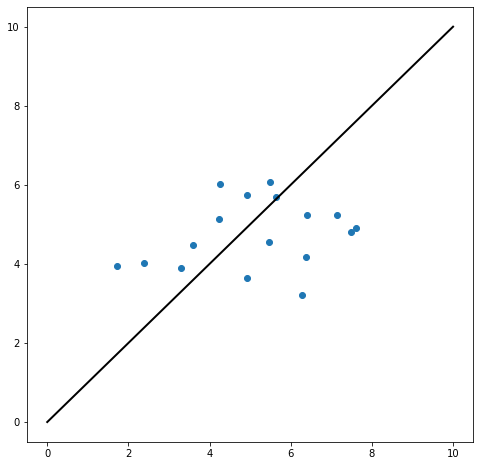

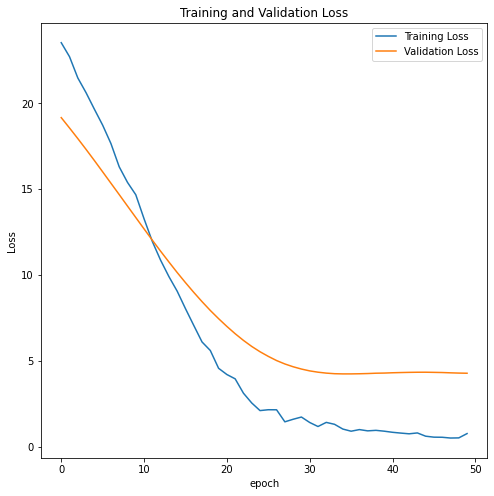

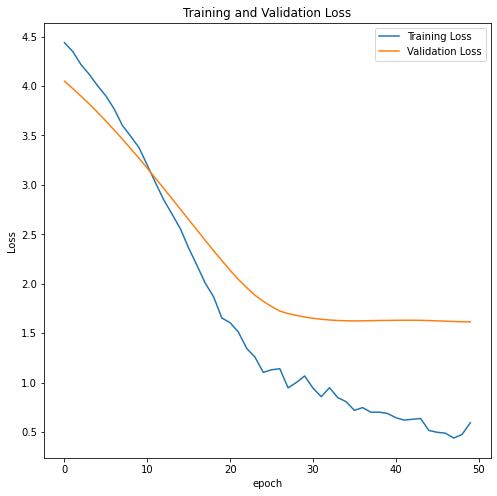

------------------------------------------------------------------------
Training for fold 2, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 14s 265ms/sample - loss: 21.5283 - mean_absolute_error: 4.2021 - val_loss: 26.6461 - val_mean_absolute_error: 4.9064
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.4325 - mean_absolute_error: 4.0827 - val_loss: 25.8998 - val_mean_absolute_error: 4.8308
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.7141 - mean_absolute_error: 4.0016 - val_loss: 25.1252 - val_mean_absolute_error: 4.7512
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 18.8221 - mean_absolute_error: 3.8829 - val_loss: 24.3329 - val_mean_absolute_error: 4.6684
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 17.5646 - mean_absolute_error: 3.7498 - val_loss: 23.5214 - val_mean_absolute_error: 4.5823
Epoch 6/50
52/52

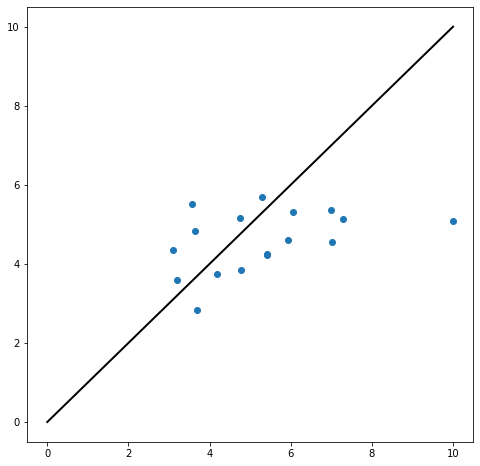

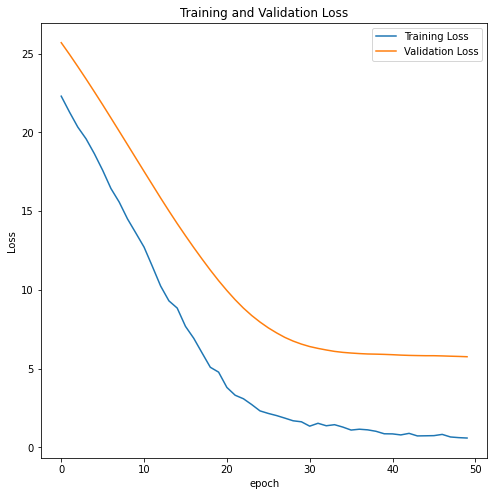

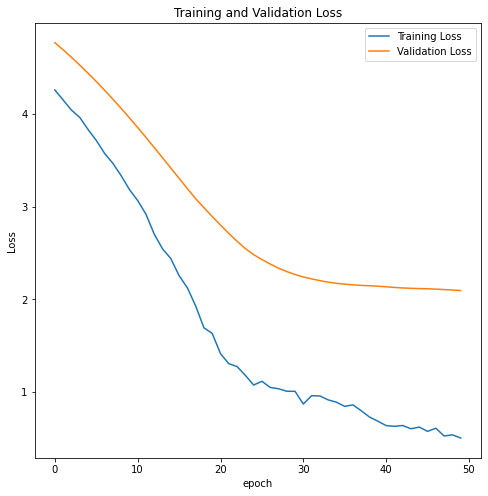

------------------------------------------------------------------------
Training for fold 3, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 14s 266ms/sample - loss: 23.1240 - mean_absolute_error: 4.4066 - val_loss: 26.0558 - val_mean_absolute_error: 4.8772
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 22.4876 - mean_absolute_error: 4.3280 - val_loss: 25.3103 - val_mean_absolute_error: 4.8008
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 21.4147 - mean_absolute_error: 4.2183 - val_loss: 24.5630 - val_mean_absolute_error: 4.7230
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.4588 - mean_absolute_error: 4.1036 - val_loss: 23.7928 - val_mean_absolute_error: 4.6414
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.3947 - mean_absolute_error: 3.9826 - val_loss: 23.0004 - val_mean_absolute_error: 4.5561
Epoch 6/50
52/52

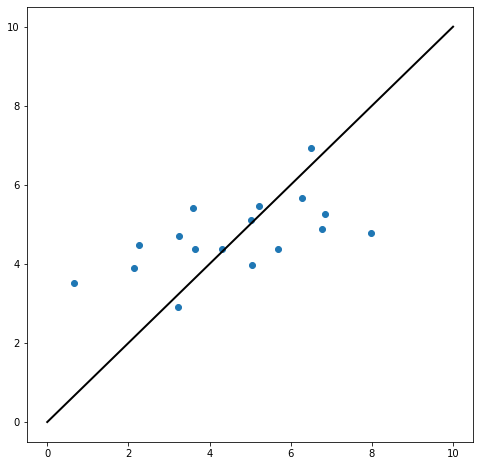

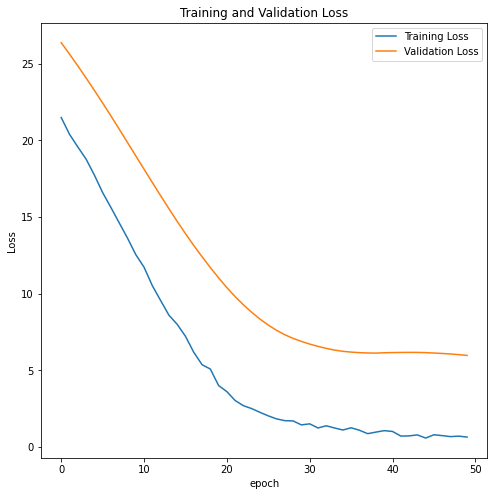

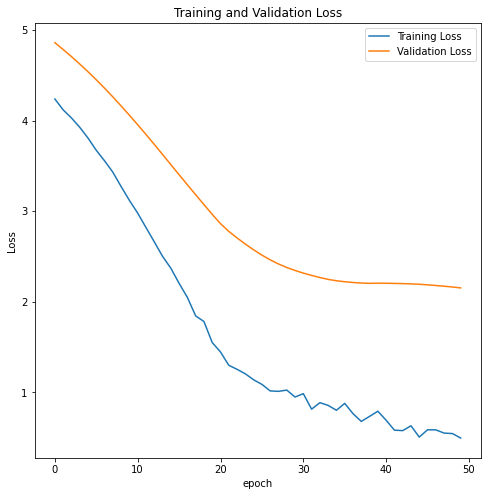

------------------------------------------------------------------------
Training for fold 4, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 14s 267ms/sample - loss: 21.9801 - mean_absolute_error: 4.2703 - val_loss: 20.6878 - val_mean_absolute_error: 4.2090
Epoch 2/50
53/53 [==============================] - 0s 6ms/sample - loss: 21.0054 - mean_absolute_error: 4.1644 - val_loss: 20.0704 - val_mean_absolute_error: 4.1368
Epoch 3/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.0848 - mean_absolute_error: 4.0576 - val_loss: 19.4451 - val_mean_absolute_error: 4.0625
Epoch 4/50
53/53 [==============================] - 0s 6ms/sample - loss: 19.0936 - mean_absolute_error: 3.9388 - val_loss: 18.8103 - val_mean_absolute_error: 3.9858
Epoch 5/50
53/53 [==============================] - 0s 6ms/sample - loss: 18.2933 - mean_absolute_error: 3.8481 - val_loss: 18.1630 - val_mean_absolute_error: 3.9062
Epoch 6/50
53/53

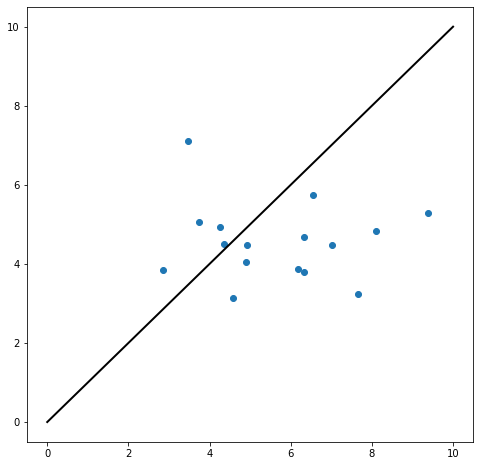

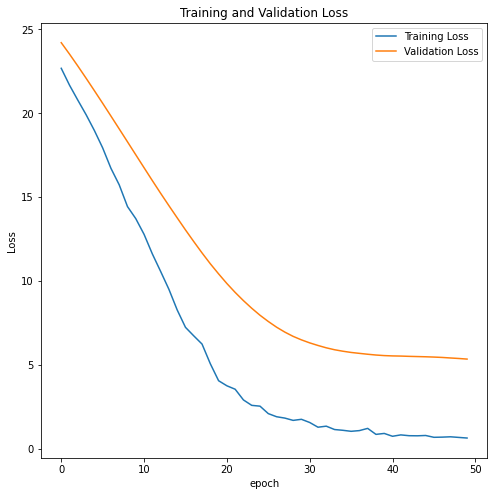

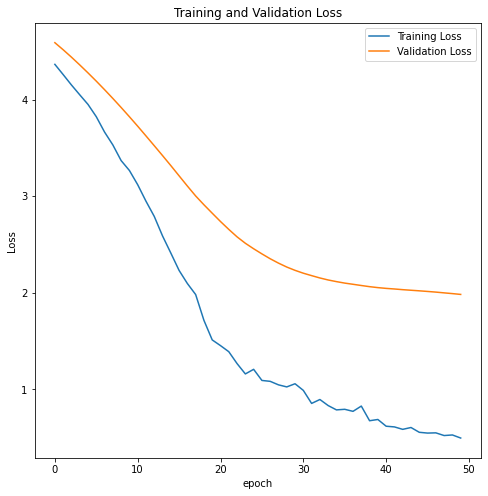

------------------------------------------------------------------------
Training for fold 5, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 14s 263ms/sample - loss: 21.7841 - mean_absolute_error: 4.2541 - val_loss: 23.2832 - val_mean_absolute_error: 4.5648
Epoch 2/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.9210 - mean_absolute_error: 4.1576 - val_loss: 22.5808 - val_mean_absolute_error: 4.4891
Epoch 3/50
53/53 [==============================] - 0s 6ms/sample - loss: 19.9856 - mean_absolute_error: 4.0555 - val_loss: 21.8555 - val_mean_absolute_error: 4.4093
Epoch 4/50
53/53 [==============================] - 0s 6ms/sample - loss: 18.9127 - mean_absolute_error: 3.9359 - val_loss: 21.1138 - val_mean_absolute_error: 4.3265
Epoch 5/50
53/53 [==============================] - 0s 6ms/sample - loss: 18.0140 - mean_absolute_error: 3.8249 - val_loss: 20.3451 - val_mean_absolute_error: 4.2393
Epoch 6/50
53/53

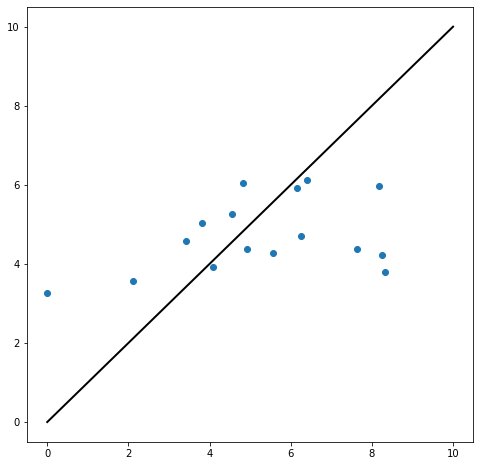

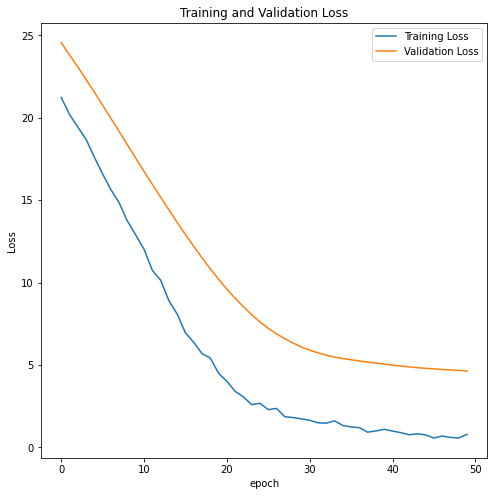

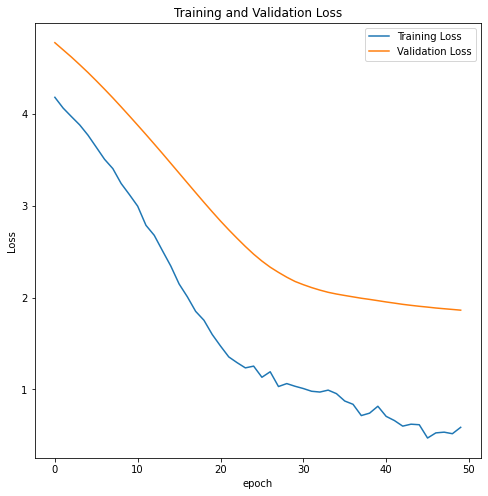

Overall spearman correlation: 0.311
------------------------------------------------------------------------
Training for fold 1, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 14s 273ms/sample - loss: 22.6851 - mean_absolute_error: 4.3121 - val_loss: 21.4119 - val_mean_absolute_error: 4.2637
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 21.6544 - mean_absolute_error: 4.2044 - val_loss: 20.7110 - val_mean_absolute_error: 4.1828
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.8553 - mean_absolute_error: 4.1132 - val_loss: 19.9945 - val_mean_absolute_error: 4.0991
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.1893 - mean_absolute_error: 4.0333 - val_loss: 19.2656 - val_mean_absolute_error: 4.0119
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 18.8903 - mean_absolute_error: 3.8905 - val_loss: 18.5216 - val_mean_abs

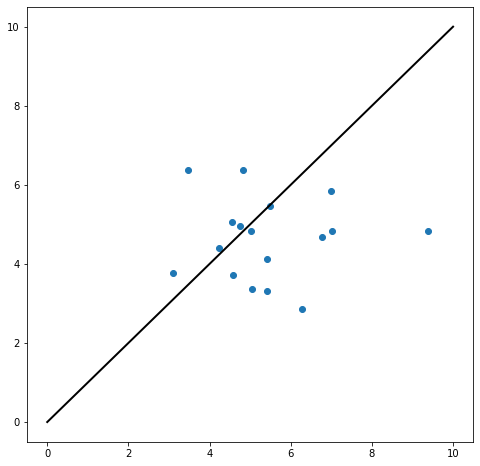

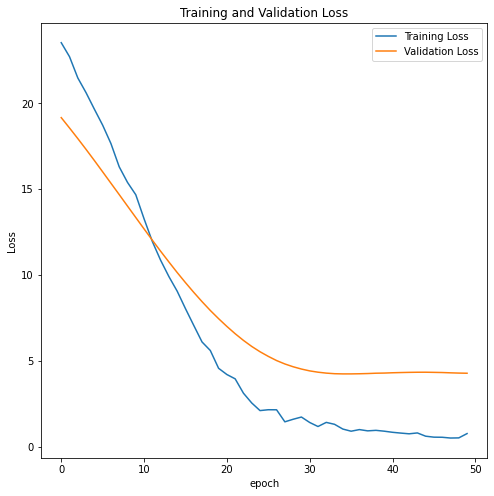

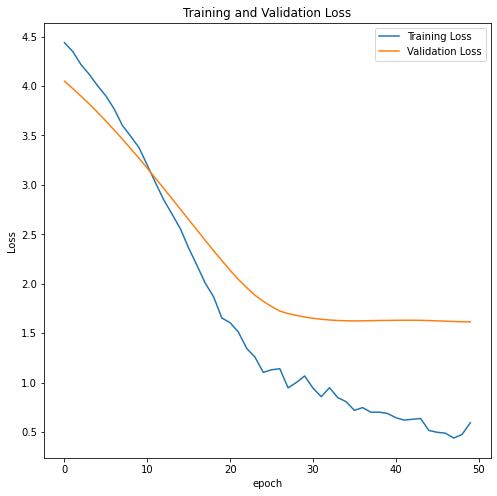

------------------------------------------------------------------------
Training for fold 2, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 14s 273ms/sample - loss: 22.2854 - mean_absolute_error: 4.2967 - val_loss: 23.7007 - val_mean_absolute_error: 4.6079
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 21.2166 - mean_absolute_error: 4.1785 - val_loss: 23.0023 - val_mean_absolute_error: 4.5353
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.4035 - mean_absolute_error: 4.0887 - val_loss: 22.2816 - val_mean_absolute_error: 4.4594
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.4678 - mean_absolute_error: 3.9736 - val_loss: 21.5478 - val_mean_absolute_error: 4.3808
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 18.3195 - mean_absolute_error: 3.8494 - val_loss: 20.7987 - val_mean_absolute_error: 4.2991
Epoch 6/50
52/52

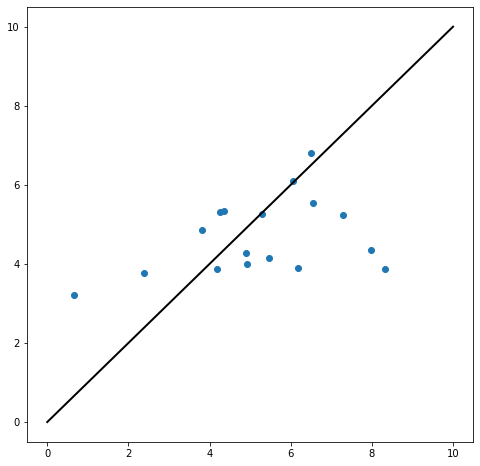

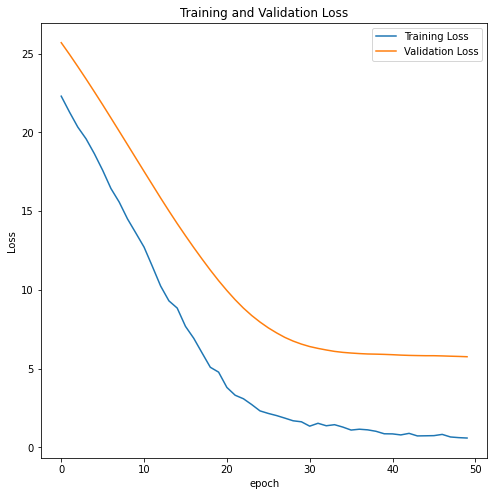

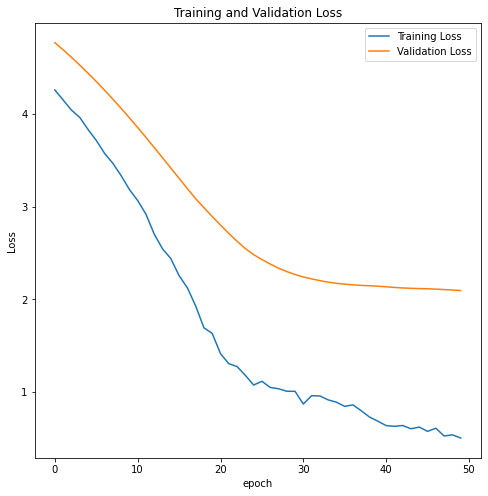

------------------------------------------------------------------------
Training for fold 3, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 14s 273ms/sample - loss: 22.3228 - mean_absolute_error: 4.3295 - val_loss: 26.6702 - val_mean_absolute_error: 4.9097
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 21.4268 - mean_absolute_error: 4.2331 - val_loss: 25.9299 - val_mean_absolute_error: 4.8355
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.4012 - mean_absolute_error: 4.1168 - val_loss: 25.1666 - val_mean_absolute_error: 4.7579
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.2998 - mean_absolute_error: 3.9896 - val_loss: 24.3754 - val_mean_absolute_error: 4.6764
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 18.4141 - mean_absolute_error: 3.8835 - val_loss: 23.5675 - val_mean_absolute_error: 4.5913
Epoch 6/50
52/52

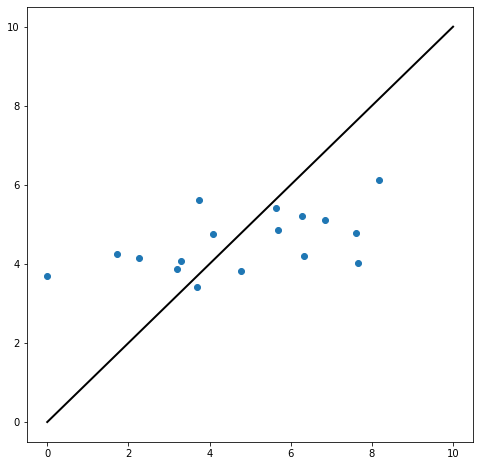

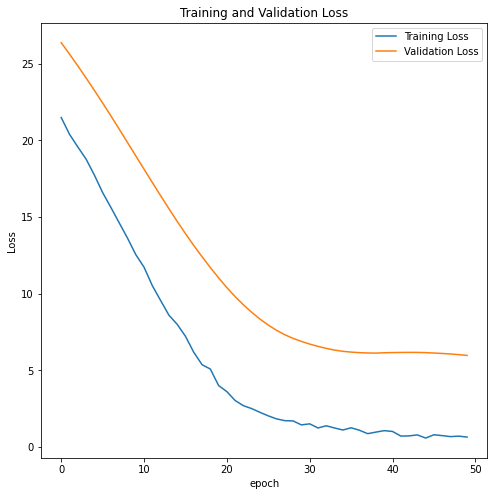

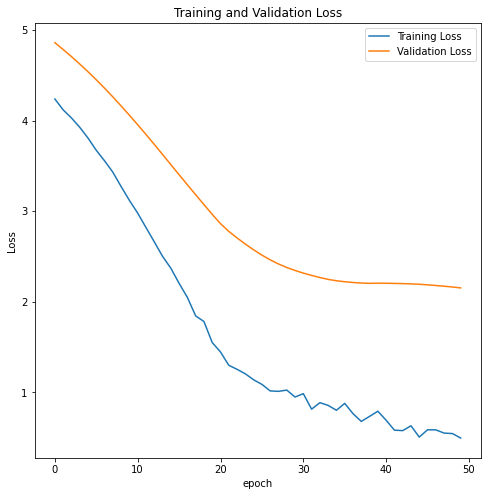

------------------------------------------------------------------------
Training for fold 4, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 14s 271ms/sample - loss: 21.8046 - mean_absolute_error: 4.2535 - val_loss: 23.6415 - val_mean_absolute_error: 4.5852
Epoch 2/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.8963 - mean_absolute_error: 4.1593 - val_loss: 22.9704 - val_mean_absolute_error: 4.5115
Epoch 3/50
53/53 [==============================] - 0s 6ms/sample - loss: 19.9219 - mean_absolute_error: 4.0469 - val_loss: 22.2781 - val_mean_absolute_error: 4.4340
Epoch 4/50
53/53 [==============================] - 0s 6ms/sample - loss: 19.0579 - mean_absolute_error: 3.9458 - val_loss: 21.5605 - val_mean_absolute_error: 4.3527
Epoch 5/50
53/53 [==============================] - 0s 6ms/sample - loss: 18.1386 - mean_absolute_error: 3.8384 - val_loss: 20.8240 - val_mean_absolute_error: 4.2679
Epoch 6/50
53/53

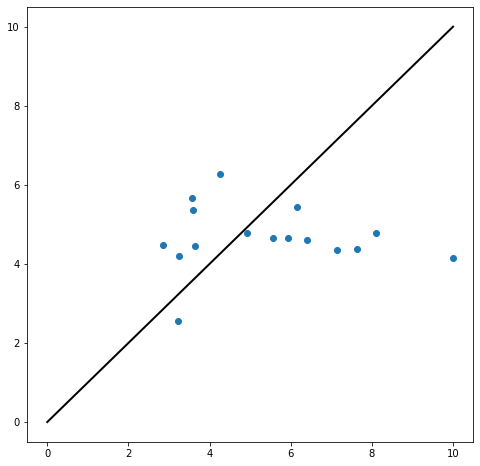

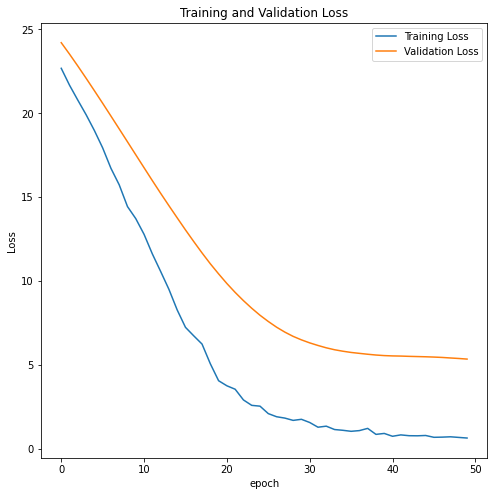

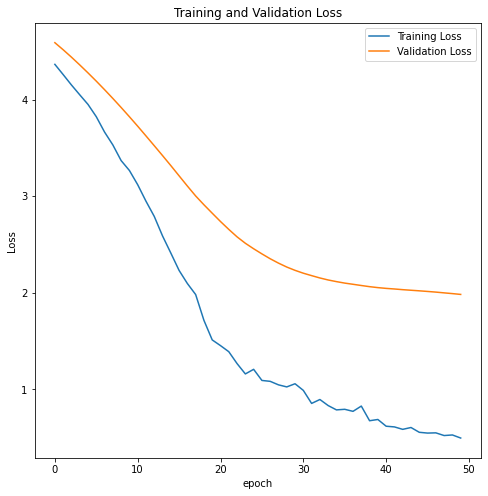

------------------------------------------------------------------------
Training for fold 5, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 14s 272ms/sample - loss: 22.9473 - mean_absolute_error: 4.4103 - val_loss: 22.7323 - val_mean_absolute_error: 4.3402
Epoch 2/50
53/53 [==============================] - 0s 6ms/sample - loss: 21.8602 - mean_absolute_error: 4.2954 - val_loss: 22.0514 - val_mean_absolute_error: 4.2713
Epoch 3/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.8998 - mean_absolute_error: 4.1968 - val_loss: 21.3604 - val_mean_absolute_error: 4.2003
Epoch 4/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.1153 - mean_absolute_error: 4.0939 - val_loss: 20.6548 - val_mean_absolute_error: 4.1266
Epoch 5/50
53/53 [==============================] - 0s 6ms/sample - loss: 18.9546 - mean_absolute_error: 3.9698 - val_loss: 19.9367 - val_mean_absolute_error: 4.0502
Epoch 6/50
53/53

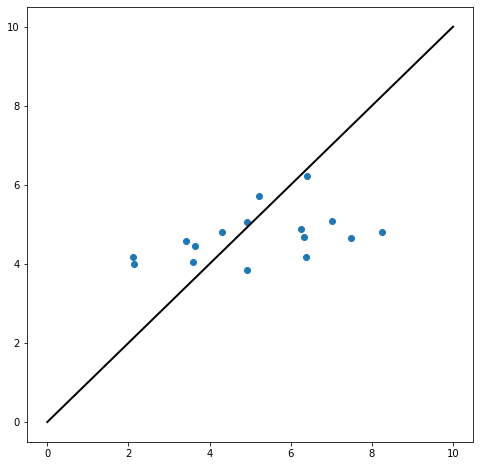

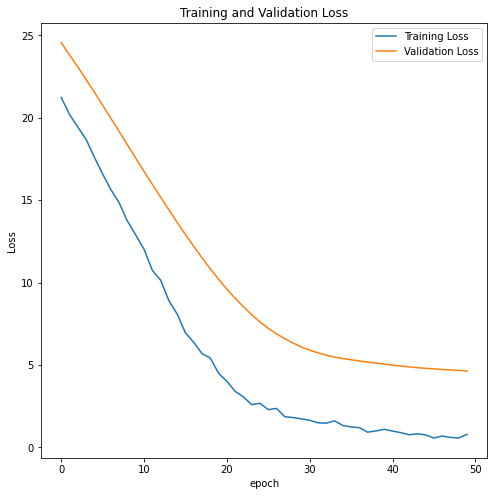

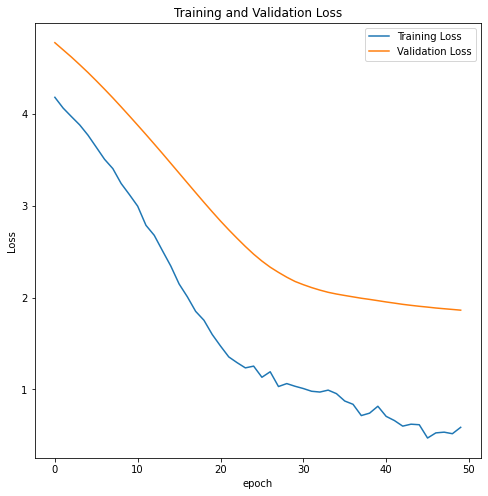

Overall spearman correlation: 0.274
------------------------------------------------------------------------
Training for fold 1, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 16s 299ms/sample - loss: 21.2983 - mean_absolute_error: 4.2054 - val_loss: 27.1626 - val_mean_absolute_error: 4.9412
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.3964 - mean_absolute_error: 4.1047 - val_loss: 26.4265 - val_mean_absolute_error: 4.8687
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.1519 - mean_absolute_error: 3.9719 - val_loss: 25.6759 - val_mean_absolute_error: 4.7935
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 18.6034 - mean_absolute_error: 3.9046 - val_loss: 24.8878 - val_mean_absolute_error: 4.7137
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 17.6182 - mean_absolute_error: 3.7757 - val_loss: 24.0667 - val_mean_abs

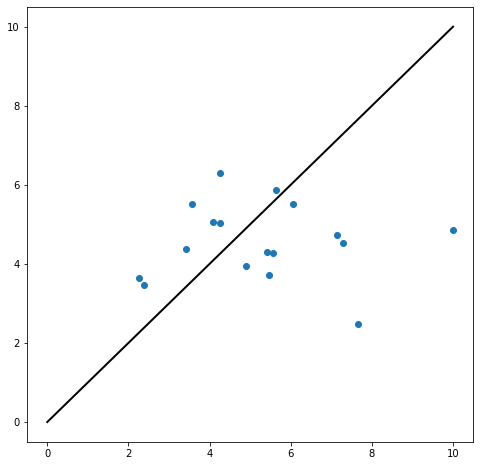

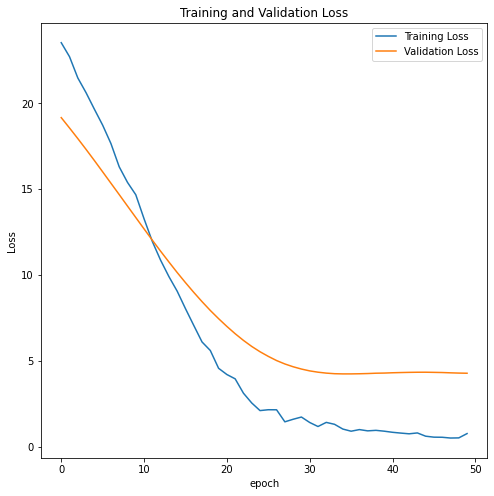

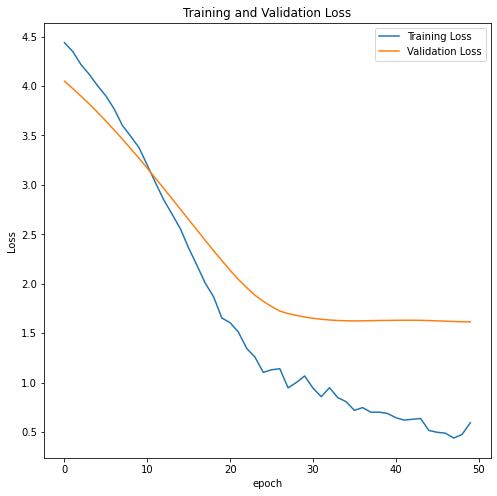

------------------------------------------------------------------------
Training for fold 2, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 15s 280ms/sample - loss: 20.6333 - mean_absolute_error: 4.1188 - val_loss: 25.5539 - val_mean_absolute_error: 4.8775
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.8473 - mean_absolute_error: 4.0292 - val_loss: 24.8564 - val_mean_absolute_error: 4.8035
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.0539 - mean_absolute_error: 3.9256 - val_loss: 24.1359 - val_mean_absolute_error: 4.7258
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 17.9184 - mean_absolute_error: 3.8003 - val_loss: 23.3974 - val_mean_absolute_error: 4.6449
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 17.0521 - mean_absolute_error: 3.7016 - val_loss: 22.6395 - val_mean_absolute_error: 4.5601
Epoch 6/50
52/52

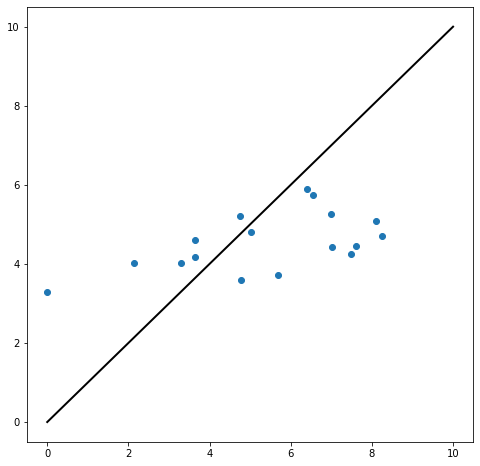

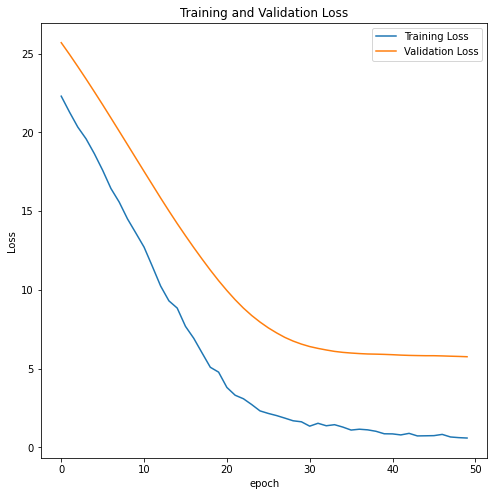

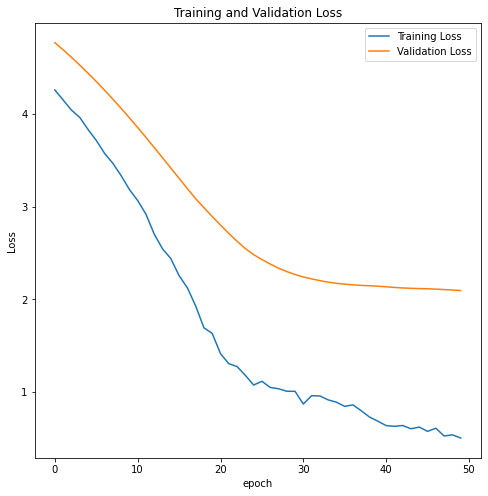

------------------------------------------------------------------------
Training for fold 3, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 15s 285ms/sample - loss: 24.6876 - mean_absolute_error: 4.5536 - val_loss: 22.3917 - val_mean_absolute_error: 4.3868
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 23.7755 - mean_absolute_error: 4.4556 - val_loss: 21.7221 - val_mean_absolute_error: 4.3106
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 22.6836 - mean_absolute_error: 4.3383 - val_loss: 21.0326 - val_mean_absolute_error: 4.2309
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 21.7555 - mean_absolute_error: 4.2346 - val_loss: 20.3336 - val_mean_absolute_error: 4.1489
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.5767 - mean_absolute_error: 4.1039 - val_loss: 19.6245 - val_mean_absolute_error: 4.0643
Epoch 6/50
52/52

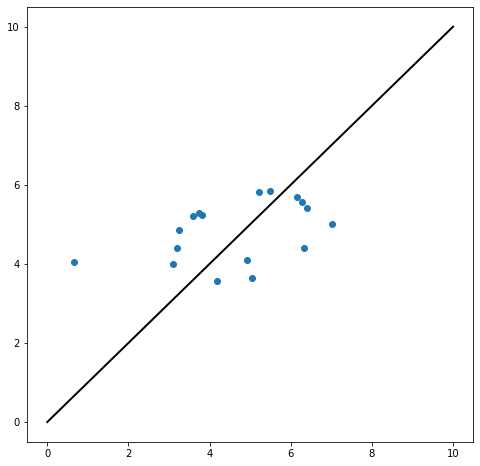

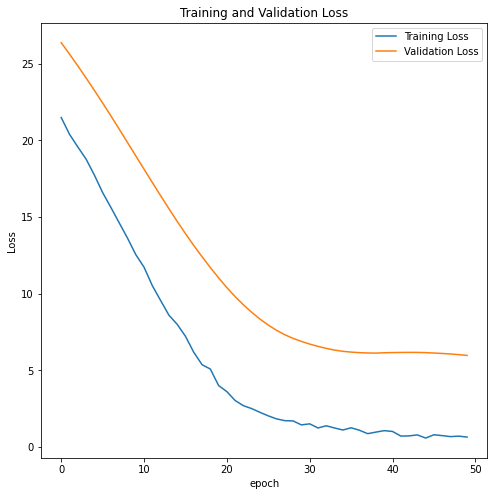

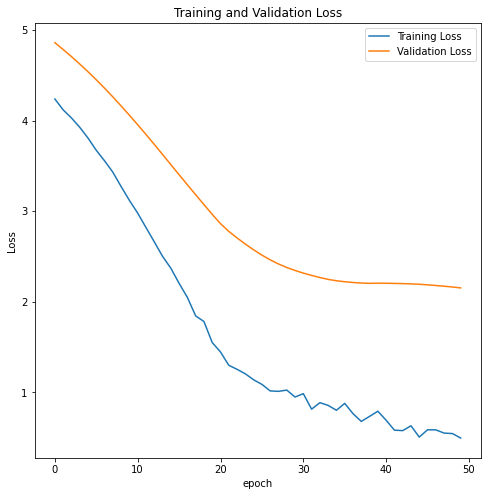

------------------------------------------------------------------------
Training for fold 4, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 15s 281ms/sample - loss: 21.1393 - mean_absolute_error: 4.1684 - val_loss: 22.5120 - val_mean_absolute_error: 4.4788
Epoch 2/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.2113 - mean_absolute_error: 4.0644 - val_loss: 21.8108 - val_mean_absolute_error: 4.4023
Epoch 3/50
53/53 [==============================] - 0s 6ms/sample - loss: 19.3198 - mean_absolute_error: 3.9527 - val_loss: 21.0906 - val_mean_absolute_error: 4.3226
Epoch 4/50
53/53 [==============================] - 0s 6ms/sample - loss: 18.3026 - mean_absolute_error: 3.8471 - val_loss: 20.3577 - val_mean_absolute_error: 4.2399
Epoch 5/50
53/53 [==============================] - 0s 6ms/sample - loss: 17.5413 - mean_absolute_error: 3.7318 - val_loss: 19.6084 - val_mean_absolute_error: 4.1537
Epoch 6/50
53/53

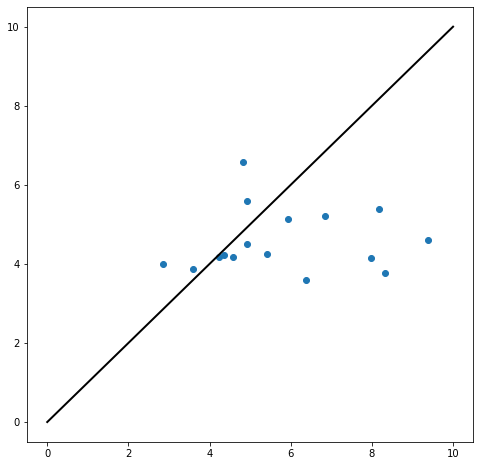

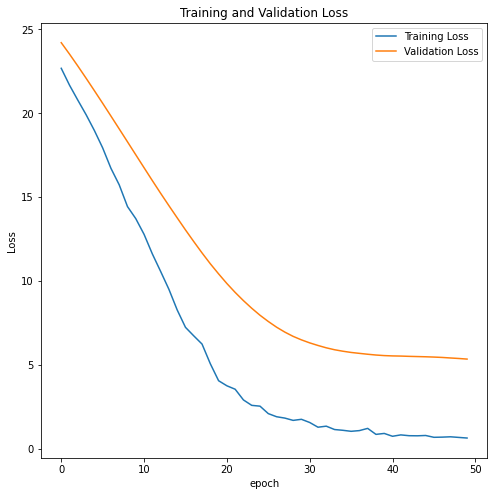

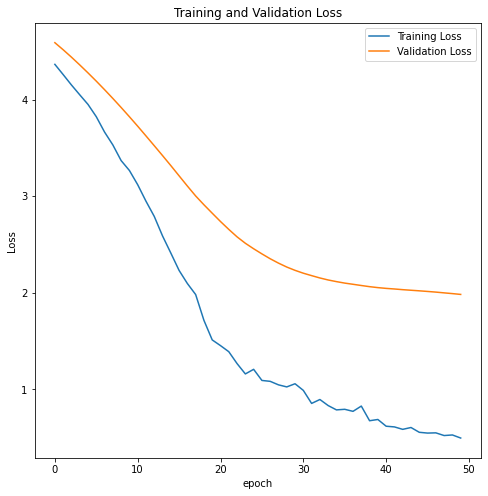

------------------------------------------------------------------------
Training for fold 5, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 15s 282ms/sample - loss: 23.3151 - mean_absolute_error: 4.4252 - val_loss: 22.5467 - val_mean_absolute_error: 4.3896
Epoch 2/50
53/53 [==============================] - 0s 6ms/sample - loss: 22.4585 - mean_absolute_error: 4.3315 - val_loss: 21.8097 - val_mean_absolute_error: 4.3063
Epoch 3/50
53/53 [==============================] - 0s 6ms/sample - loss: 21.4141 - mean_absolute_error: 4.2178 - val_loss: 21.0535 - val_mean_absolute_error: 4.2192
Epoch 4/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.6234 - mean_absolute_error: 4.1362 - val_loss: 20.2794 - val_mean_absolute_error: 4.1286
Epoch 5/50
53/53 [==============================] - 0s 6ms/sample - loss: 19.6319 - mean_absolute_error: 4.0281 - val_loss: 19.4926 - val_mean_absolute_error: 4.0345
Epoch 6/50
53/53

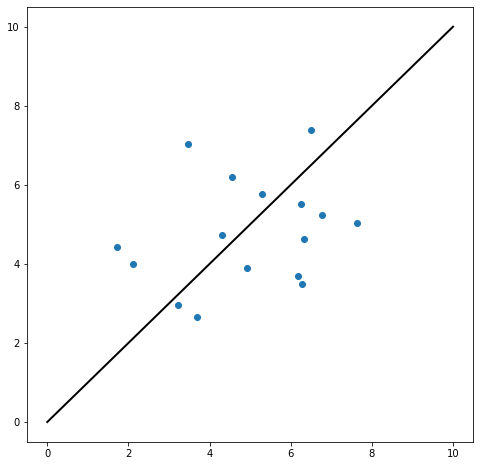

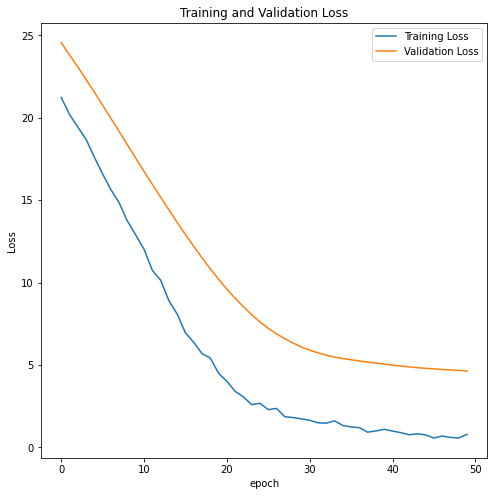

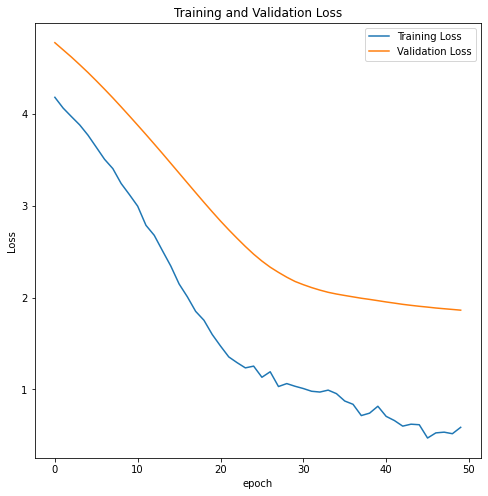

Overall spearman correlation: 0.246
------------------------------------------------------------------------
Training for fold 1, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 15s 291ms/sample - loss: 22.8457 - mean_absolute_error: 4.3267 - val_loss: 23.3534 - val_mean_absolute_error: 4.5141
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 22.0450 - mean_absolute_error: 4.2297 - val_loss: 22.6841 - val_mean_absolute_error: 4.4393
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.9015 - mean_absolute_error: 4.1062 - val_loss: 22.0002 - val_mean_absolute_error: 4.3615
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.1575 - mean_absolute_error: 4.0269 - val_loss: 21.2879 - val_mean_absolute_error: 4.2794
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.0516 - mean_absolute_error: 3.9021 - val_loss: 20.5544 - val_mean_abs

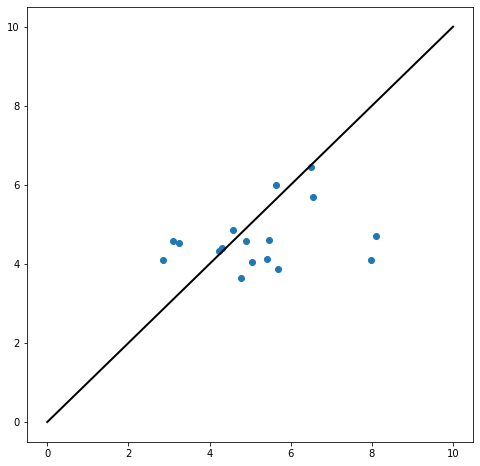

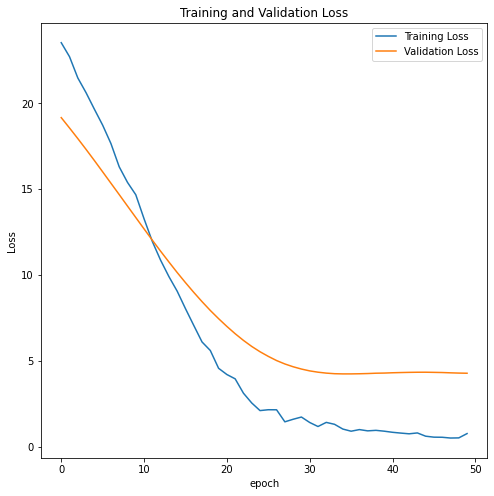

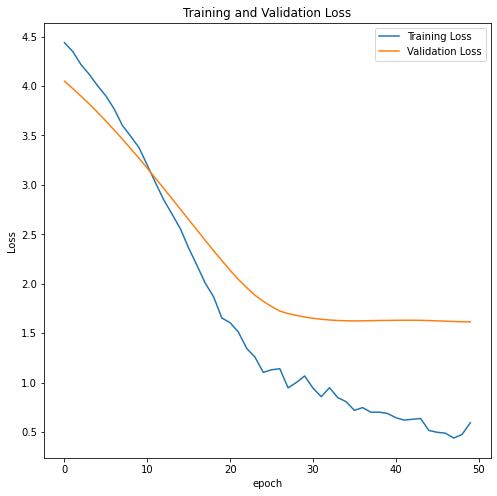

------------------------------------------------------------------------
Training for fold 2, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 15s 288ms/sample - loss: 21.2444 - mean_absolute_error: 4.1767 - val_loss: 25.0385 - val_mean_absolute_error: 4.7019
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.2587 - mean_absolute_error: 4.0660 - val_loss: 24.3386 - val_mean_absolute_error: 4.6283
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.3461 - mean_absolute_error: 3.9728 - val_loss: 23.6016 - val_mean_absolute_error: 4.5495
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 18.3791 - mean_absolute_error: 3.8678 - val_loss: 22.8389 - val_mean_absolute_error: 4.4669
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 17.4788 - mean_absolute_error: 3.7527 - val_loss: 22.0623 - val_mean_absolute_error: 4.3812
Epoch 6/50
52/52

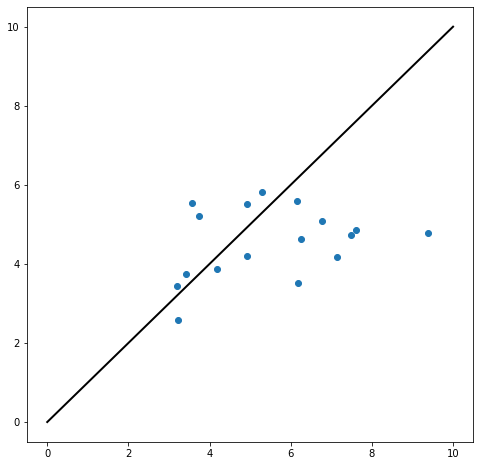

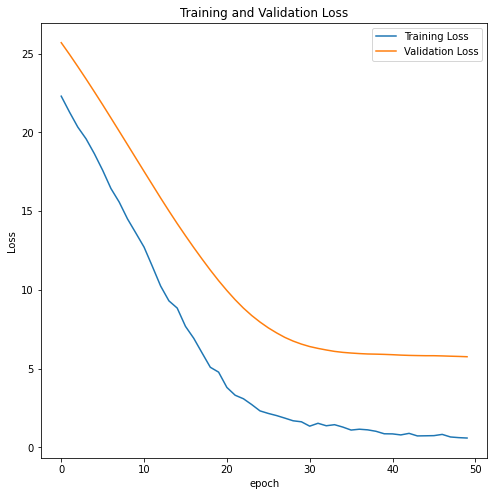

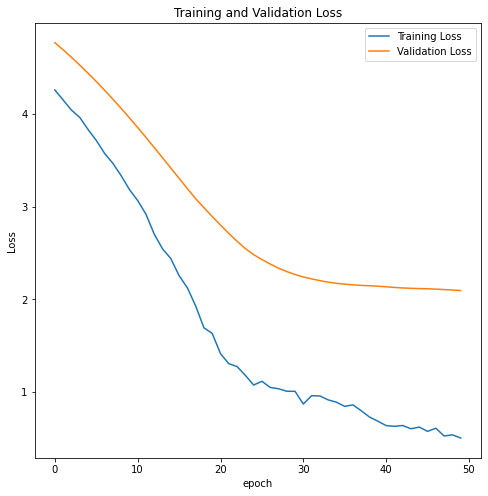

------------------------------------------------------------------------
Training for fold 3, seed 400 ...
Train on 52 samples, validate on 14 samples
Epoch 1/50
52/52 [==============================] - 16s 307ms/sample - loss: 23.4558 - mean_absolute_error: 4.4421 - val_loss: 22.4163 - val_mean_absolute_error: 4.3815
Epoch 2/50
52/52 [==============================] - 0s 6ms/sample - loss: 22.5470 - mean_absolute_error: 4.3473 - val_loss: 21.7557 - val_mean_absolute_error: 4.3077
Epoch 3/50
52/52 [==============================] - 0s 6ms/sample - loss: 21.5022 - mean_absolute_error: 4.2365 - val_loss: 21.0815 - val_mean_absolute_error: 4.2315
Epoch 4/50
52/52 [==============================] - 0s 6ms/sample - loss: 20.5037 - mean_absolute_error: 4.1303 - val_loss: 20.3885 - val_mean_absolute_error: 4.1519
Epoch 5/50
52/52 [==============================] - 0s 6ms/sample - loss: 19.7029 - mean_absolute_error: 4.0361 - val_loss: 19.6831 - val_mean_absolute_error: 4.0692
Epoch 6/50
52/52

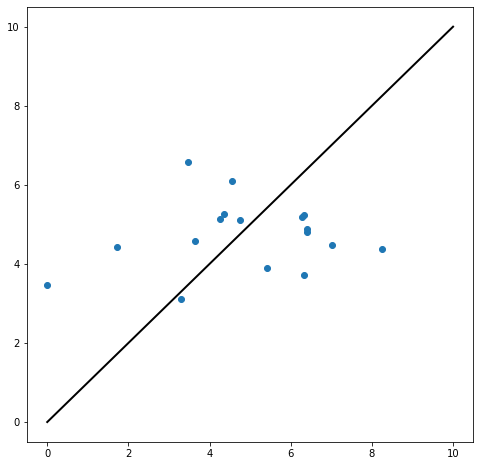

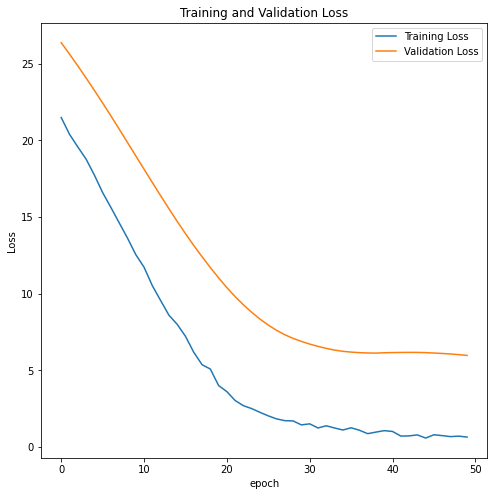

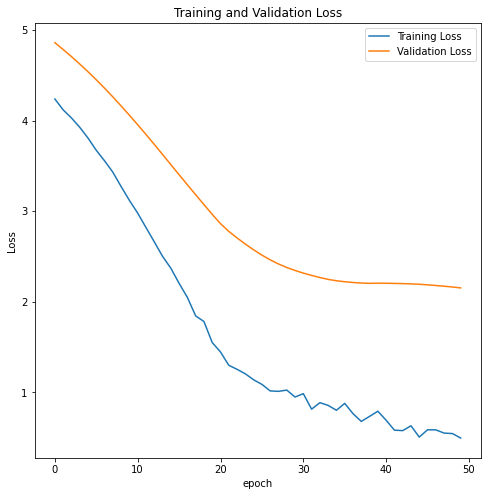

------------------------------------------------------------------------
Training for fold 4, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 15s 284ms/sample - loss: 22.6244 - mean_absolute_error: 4.3158 - val_loss: 23.4122 - val_mean_absolute_error: 4.6647
Epoch 2/50
53/53 [==============================] - 0s 6ms/sample - loss: 21.7762 - mean_absolute_error: 4.2203 - val_loss: 22.6780 - val_mean_absolute_error: 4.5857
Epoch 3/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.8809 - mean_absolute_error: 4.1242 - val_loss: 21.9208 - val_mean_absolute_error: 4.5028
Epoch 4/50
53/53 [==============================] - 0s 6ms/sample - loss: 19.9094 - mean_absolute_error: 4.0163 - val_loss: 21.1372 - val_mean_absolute_error: 4.4152
Epoch 5/50
53/53 [==============================] - 0s 6ms/sample - loss: 18.9761 - mean_absolute_error: 3.9184 - val_loss: 20.3511 - val_mean_absolute_error: 4.3257
Epoch 6/50
53/53

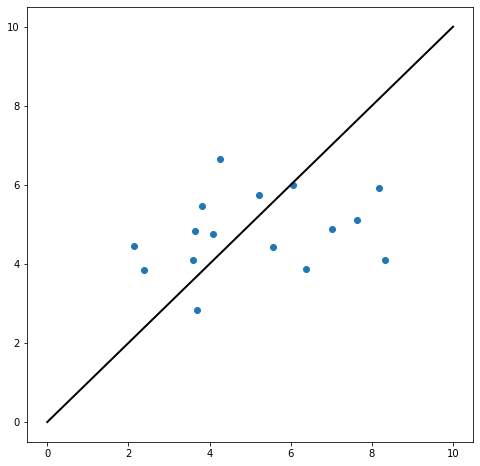

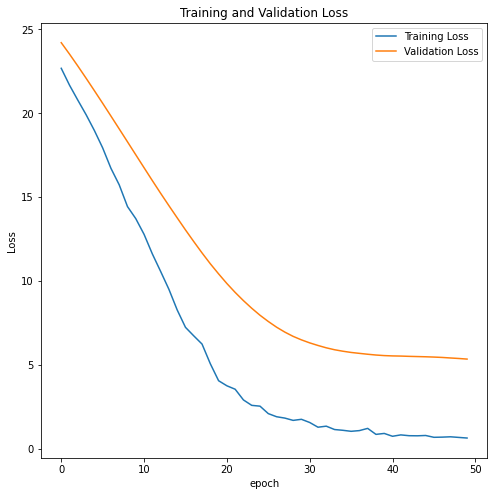

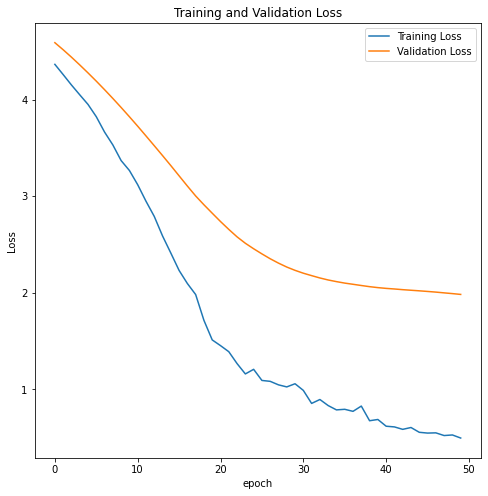

------------------------------------------------------------------------
Training for fold 5, seed 400 ...
Train on 53 samples, validate on 14 samples
Epoch 1/50
53/53 [==============================] - 15s 286ms/sample - loss: 21.0753 - mean_absolute_error: 4.2201 - val_loss: 25.8694 - val_mean_absolute_error: 4.7871
Epoch 2/50
53/53 [==============================] - 0s 6ms/sample - loss: 20.2436 - mean_absolute_error: 4.1326 - val_loss: 25.1086 - val_mean_absolute_error: 4.7083
Epoch 3/50
53/53 [==============================] - 0s 6ms/sample - loss: 19.2377 - mean_absolute_error: 4.0175 - val_loss: 24.3328 - val_mean_absolute_error: 4.6268
Epoch 4/50
53/53 [==============================] - 0s 6ms/sample - loss: 18.3031 - mean_absolute_error: 3.9053 - val_loss: 23.5415 - val_mean_absolute_error: 4.5421
Epoch 5/50
53/53 [==============================] - 0s 6ms/sample - loss: 17.3363 - mean_absolute_error: 3.7876 - val_loss: 22.7277 - val_mean_absolute_error: 4.4536
Epoch 6/50
53/53

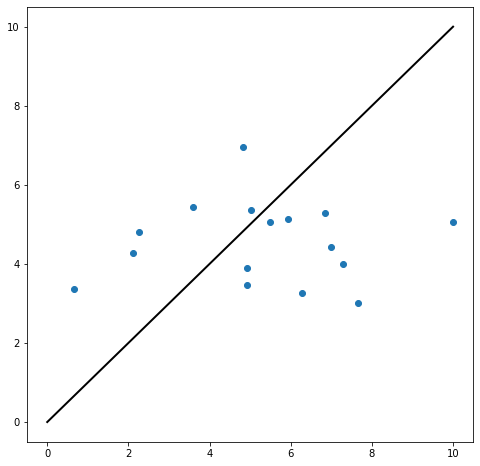

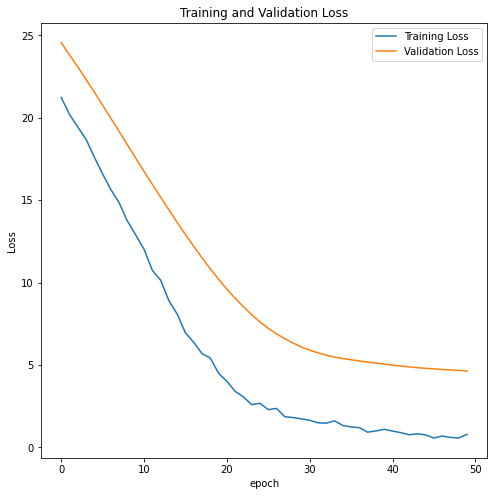

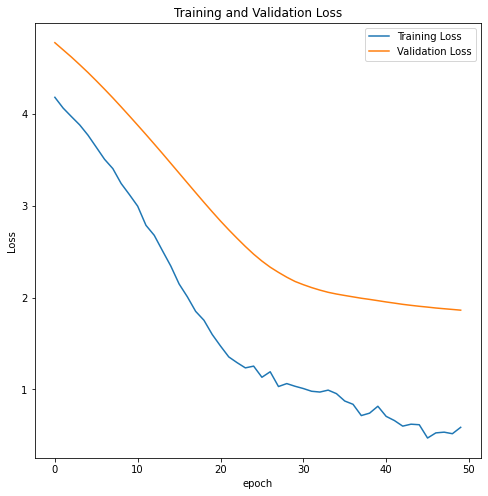

Overall spearman correlation: 0.167


In [51]:
# run the one-step TL framework with 5-fold CV for 10 times
loss = []
val_loss = []
mse = []
val_mse = []
overall_cor_res = []
corr_list_all = []

# K-fold Cross Validation model evaluation

fold_no = 0
for k in range(0,10):
    
    exp_train = [0]*5
    exp_test = [0]*5
    auc_train = [0]*5
    auc_test = [0]*5
    pred_res = []
    corr_list = []
      
    for fold_no in range(0,5):
        
        # split dataset
        exp_train[fold_no], exp_test[fold_no] = hgcc2.iloc[train_index[k][fold_no],:], hgcc2.iloc[test_index[k][fold_no],:]
        auc_train[fold_no], auc_test[fold_no] = auc_norm["AUC_Temozolomide"][train_index[k][fold_no]], auc_norm["AUC_Temozolomide"][test_index[k][fold_no]]

        
        # normalize
        exp_train[fold_no] = Standard.fit_transform(exp_train[fold_no])
        exp_test[fold_no] = Standard.fit_transform(exp_test[fold_no])
    
        # Generate a print
        print('------------------------------------------------------------------------')
        print(f'Training for fold {(fold_no+1)}, seed {seed_num} ...')
    
        # Create a basic model instance
        pred_model = create_model2(l2 = 0.0001,l1=0.0001,opt = tf.keras.optimizers.Adam(learning_rate= 0.0001))

    
        
        refine_model = pred_model.fit(x=exp_train[fold_no], y=auc_train[fold_no], epochs=50, batch_size=32,
                                      validation_split=0.2
                                     ) 
        
            

    
        # predict and evaluate
        pred = pred_model.predict(exp_test[fold_no])
        pred = pd.DataFrame(pred)
        pred_res.append(pred)
        test = auc_test[fold_no].reset_index(drop = True)
        # print(R2(test,pred[0]))
    
        # calculate Pearson's correlation
        corr, _ = spearmanr(test, pred[0])
        print('Spearman correlation: %.3f' % corr)
        corr_list.append(corr)
    
        plt.figure(figsize=(8, 8))
        plt.scatter(test,pred[0])
        plt.plot([0, 10], [0, 10], 'k-', lw=2)
    
        # plot loss train and validate
        loss.append(refine_model.history['loss'])
        val_loss.append(refine_model.history['val_loss'])
        plt_loss(loss[fold_no],val_loss[fold_no],fold_no+1)
    
        # plot acc train and validate
        mse.append(refine_model.history['mean_absolute_error'])
        val_mse.append(refine_model.history['val_mean_absolute_error'])
        plt_loss(mse[fold_no],val_mse[fold_no],fold_no+1)


        
    corr_list_all.append(corr_list)
    # test_all
    test_all = np.concatenate([auc_test[0],auc_test[1],auc_test[2],auc_test[3],auc_test[4]])#
    # pred_all 
    pred_all = np.concatenate([pred_res[0][0],pred_res[1][0],pred_res[2][0],pred_res[3][0],pred_res[4][0]])#
    overall_cor, _ = spearmanr(test_all, pred_all)
    overall_cor_res.append(overall_cor)
    print('Overall spearman correlation: %.3f' % overall_cor)
    
    # break

In [52]:
overall_cor_res

[0.2520884933462071,
 0.27855673565341504,
 0.2736660929432013,
 0.27578607111372316,
 0.19438730531883627,
 0.16783510348012257,
 0.3105663070400067,
 0.27414886024935975,
 0.24579152848327104,
 0.16724738675958187]

In [53]:
np.mean(overall_cor_res)

0.24400738843877248

Train on 83 samples
Epoch 1/50
83/83 [==============================] - 2s 18ms/sample - loss: 22.6079 - mean_absolute_error: 4.3663
Epoch 2/50
83/83 [==============================] - 0s 3ms/sample - loss: 21.3860 - mean_absolute_error: 4.2275
Epoch 3/50
83/83 [==============================] - 0s 3ms/sample - loss: 19.8528 - mean_absolute_error: 4.0451
Epoch 4/50
83/83 [==============================] - 0s 3ms/sample - loss: 18.5520 - mean_absolute_error: 3.9035
Epoch 5/50
83/83 [==============================] - 0s 3ms/sample - loss: 17.2089 - mean_absolute_error: 3.7392
Epoch 6/50
83/83 [==============================] - 0s 3ms/sample - loss: 15.6296 - mean_absolute_error: 3.5296
Epoch 7/50
83/83 [==============================] - 0s 3ms/sample - loss: 14.1710 - mean_absolute_error: 3.3223
Epoch 8/50
83/83 [==============================] - 0s 3ms/sample - loss: 12.7224 - mean_absolute_error: 3.1291
Epoch 9/50
83/83 [==============================] - 0s 3ms/sample - loss: 11.2705 -

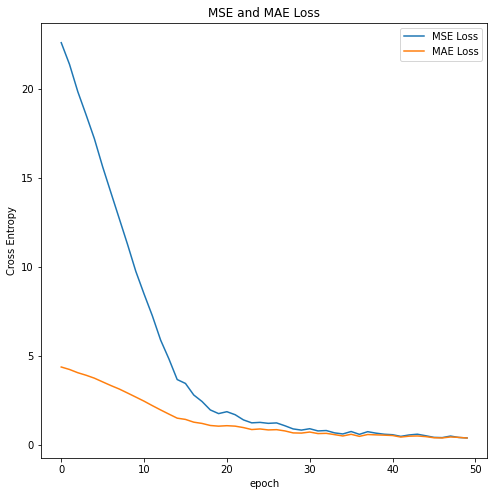

In [86]:
# run the model on the whole dataset and save weights for the following experiments

df_all = Standard.fit_transform(hgcc2)

model_final = create_model2(l2 = 0.0001,l1=0.0001,opt = tf.keras.optimizers.Adam(learning_rate=0.0001))
final_train = model_final.fit(x=df_all, y=auc_norm["AUC_Temozolomide"], epochs=50, batch_size=32)

loss = final_train.history['loss']
# val_loss = final_train.history['val_loss']


mae = final_train.history['mean_absolute_error']

#plt.subplot(2, 1, 2)
plt.figure(figsize=(8, 8))
plt.plot(loss, label='MSE Loss')
plt.plot(mae, label='MAE Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('MSE and MAE Loss')
plt.xlabel('epoch')
plt.show()

model_final.save_weights("HGCC_model_with_GDSC.h5")